In [2]:
#Imports
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import geopandas as gpd
import matplotlib.pyplot as plt
from mpl_toolkits.axes_grid1 import make_axes_locatable
from datetime import datetime, timedelta
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)

In [3]:


# # Try different encodings (e.g., 'utf-8', 'latin-1', 'ISO-8859-1') until you find the correct one
# encodings = ['utf-8', 'latin-1', 'ISO-8859-1']

# for encoding in encodings:
#     try:
#         df_raw = pd.read_csv('ProfEngrsLandSurvyrsGeologist_Data.csv', encoding=encoding)
#         print(f"File read successfully with encoding: {encoding}")
#         break
#     except UnicodeDecodeError:
#         print(f"Error decoding with encoding: {encoding}. Trying the next one.")

# # If none of the encodings work, you might need to investigate the file and its actual encoding.


In [4]:
#Read in Data
df_raw = pd.read_csv('ProfEngrsLandSurvyrsGeologist_Data.csv', encoding= 'latin-1')
df_raw_secondary = pd.read_csv('details_civil.csv')

C:\Users\James\AppData\Local\Temp\ipykernel_22900\3672444923.py:2: DtypeWarning: Columns (2) have mixed types. Specify dtype option on import or set low_memory=False.
  df_raw = pd.read_csv('ProfEngrsLandSurvyrsGeologist_Data.csv', encoding= 'latin-1')


In [5]:
#Remove Unused Columns

df_raw = df_raw[[#'Agency Name', 
    'License Type', 
    # 'Speciality Code', 
    'License Number',
    # 'Indiv/Org', 
    'Org/Last Name', 'First Name', 'Middle Name', 'Suffix',
    'Address Line 1', 'Address Line 2', 'City', 'County', 'State', 
    #'Zip',
       #'Country', 
       'Original Issue Date', 
       'Expiration Date', 
    #    'School', 'Year Graduated', 'Degree', 
    'License Status']]

In [6]:
#Make Civil, LS and Dual Dataframes

df_raw_ls = df_raw[df_raw['License Type'] == 'Civil Engineer']
df_raw_ls_active = df_raw_ls[df_raw_ls['License Status'] == 'Active']


In [7]:
df_raw_ls_active.dtypes

License Type           object
License Number          int64
Org/Last Name          object
First Name             object
Middle Name            object
Suffix                 object
Address Line 1         object
Address Line 2         object
City                   object
County                 object
State                  object
Original Issue Date    object
Expiration Date        object
License Status         object
dtype: object

In [8]:
df_raw_ls_active.describe(include='all')

License Type  License Number Org/Last Name First Name Middle Name   
count            57233    57233.000000         57233      57233       35115  \
unique               1             NaN         27244      10897        7682   
top     Civil Engineer             NaN           Lee    Michael     Michael   
freq             57233             NaN           397       1446         768   
mean               NaN    63953.312163           NaN        NaN         NaN   
std                NaN    20348.424310           NaN        NaN         NaN   
min                NaN     8272.000000           NaN        NaN         NaN   
25%                NaN    48714.000000           NaN        NaN         NaN   
50%                NaN    65809.000000           NaN        NaN         NaN   
75%                NaN    81180.000000           NaN        NaN         NaN   
max                NaN    95856.000000           NaN        NaN         NaN   

       Suffix        Address Line 1 Address Line 2       City       County   
count    1293                 57233           2185      57233        42735  \
unique      7                 54947           1576       4122           58   
top        Jr  1955 Workman Mill Rd      Suite 200  San Diego  Los Angeles   
freq      778                    24             31       1997         7400   
mean      NaN                   NaN            NaN        NaN          NaN   
std       NaN                   NaN            NaN        NaN          NaN   
min       NaN                   NaN            NaN        NaN          NaN   
25%       NaN                   NaN            NaN        NaN          NaN   
50%       NaN                   NaN            NaN        NaN          NaN   
75%       NaN                   NaN            NaN        NaN          NaN   
max       NaN                   NaN            NaN        NaN          NaN   

        State Original Issue Date Expiration Date License Status  
count   56599               57200           57233          57233  
unique     57                 991              15              1  
top        CA           8/21/1987       6/30/2025         Active  
freq    42736                1208            8662          57233  
mean      NaN                 NaN             NaN            NaN  
std       NaN                 NaN             NaN            NaN  
min       NaN                 NaN             NaN            NaN  
25%       NaN                 NaN             NaN            NaN  
50%       NaN                 NaN             NaN            NaN  
75%       NaN                 NaN             NaN            NaN  
max       NaN                 NaN             NaN            NaN

In [9]:
# import pandas as pd
# import numpy as np
# import matplotlib.pyplot as plt
# from scipy.stats import norm

# def plot_bell_curve_from_df_column(df, column_name):
#     """
#     This function takes a pandas DataFrame and the column name for which the bell curve is to be plotted.
#     It calculates the summary statistics and then plots the bell curve.
    
#     Parameters:
#     - df: pandas DataFrame containing the data
#     - column_name: string, the name of the column to plot the bell curve for
    
#     Returns:
#     - This function does not return anything. It plots the bell curve.
#     """
#     # Calculate summary statistics from the DataFrame column
#     stats = df[column_name].describe()
#     mean = stats['mean']
#     std = stats['std']
#     min_value = stats['min']
#     max_value = stats['max']
    
#     # Generate a range of x values from the min to the max
#     x = np.linspace(min_value, max_value, 1000)
    
#     # Calculate the normal distribution's probability density function (PDF) using the given mean and std
#     pdf = norm.pdf(x, mean, std)
    
#     # Plot the bell curve with the adjusted x range
#     plt.figure(figsize=(10, 6))
#     plt.plot(x, pdf, label='Normal Distribution', color='blue')
#     plt.title(f'Bell Curve for {column_name} Distribution (Current Active)')
#     plt.xlabel(column_name)
#     plt.ylabel('Probability Density')
#     plt.grid(True)
#     plt.fill_between(x, pdf, alpha=0.2)  # Fill under the curve for visual emphasis
#     plt.xlim(min_value, max_value)  # Set the limits of the x-axis to match min and max values
#     plt.legend()
#     plt.show()

# # Example usage:
# # Assuming 'your_dataframe' is a pandas DataFrame and 'YourColumnName' is the column you want to analyze.
# # plot_bell_curve_from_df_column(your_dataframe, 'YourColumnName')


In [10]:
# plot_bell_curve_from_df_column(df_raw_ls_active, 'License Age')

In [11]:
df_raw_all_with_secondary = pd.concat([df_raw_ls, df_raw_secondary], ignore_index=True)

In [12]:
df_raw_all_with_secondary = df_raw_all_with_secondary.sort_values(by='License Number')

In [13]:
df_raw_all_with_secondary['County'] = df_raw_all_with_secondary['County'].str.title()

df_raw_all_with_secondary.head()

License Type  License Number Org/Last Name First Name Middle Name   
62165          NaN            6001       JOHNSON     DARWIN           W  \
62166          NaN            6003       PARSONS       PAUL           G   
62167          NaN            6004         DODDS       FORD           S   
62168          NaN            6006        SEEGER    WILLIAM           R   
62169          NaN            6008      KNOWLTON          C        F JR   

      Suffix                   Address Line 1          Address Line 2 City   
62165    NaN            1244 CESAR CHAVEZ AVE  MONTEREY PARK CA 91754  NaN  \
62166    NaN              779 SANTA ANITA AVE     SAN MARINO CA 91108  NaN   
62167    NaN       525 W EL NORTE PKWY SP 104      ESCONDIDO CA 92026  NaN   
62168    NaN             501 VIA CASITAS #714      GREENBRAE CA 94904  NaN   
62169    NaN  BOX 382 - 631 WILSHIRE BLVD 209   SANTA MONICA CA 90406  NaN   

            County State Original Issue Date Expiration Date License Status   
62165  Los Angeles   NaN           7/28/1943       9/30/2006      CANCELLED  \
62166  Los Angeles   NaN           7/28/1943       9/30/1988      CANCELLED   
62167    San Diego   NaN           7/28/1943       9/30/1988      CANCELLED   
62168        Marin   NaN            8/2/1943       9/30/1992      CANCELLED   
62169  Los Angeles   NaN           7/24/1943       9/30/1984      CANCELLED   

                                                     URL  
62165  https://search.dca.ca.gov/details/7500/C/6001/...  
62166  https://search.dca.ca.gov/details/7500/C/6003/...  
62167  https://search.dca.ca.gov/details/7500/C/6004/...  
62168  https://search.dca.ca.gov/details/7500/C/6006/...  
62169  https://search.dca.ca.gov/details/7500/C/6008/...

In [14]:
duplicates = df_raw_all_with_secondary['License Number'].duplicated(keep=False)
duplicate_license_numbers = df_raw_all_with_secondary[duplicates]['License Number']
# Convert to a list
duplicate_license_numbers_list = duplicate_license_numbers.tolist()
print(duplicate_license_numbers)

Series([], Name: License Number, dtype: int64)


In [15]:
# df_raw_all_with_secondary.to_csv("civil_all_with_nonactive.csv")

In [16]:

# # Extracting license numbers
# license_numbers_selected = df_raw_all_with_secondary['License Number']

# # Finding missing license numbers between 3000 and 9863
# all_license_range_selected = set(range(2650, 9843))
# missing_license_numbers_selected = all_license_range_selected - set(license_numbers_selected)

# # Sorting the missing license numbers for easier viewing
# sorted_missing_license_numbers_selected = sorted(list(missing_license_numbers_selected))

# sorted_missing_license_numbers_selected[:10]  # Displaying the first 10 for brevity

# # Convert the missing license numbers to a DataFrame
# missing_license_selected_df = pd.DataFrame(sorted_missing_license_numbers_selected, columns=['Missing License Numbers'])

# # Save the DataFrame to a CSV file
# output_file_selected_path = 'missing_license_numbers_selected.csv'
# # missing_license_selected_df.to_csv(output_file_selected_path, index=False)

# output_file_selected_path


In [17]:
df_raw_ls_non_active = df_raw_all_with_secondary[df_raw_all_with_secondary['License Status'] != 'Active']

In [18]:
def calculate_average_license_age(df, date_column='Original Issue Date'):
    # Convert 'Original Issue Date' to datetime
    df[date_column] = pd.to_datetime(df[date_column], errors='coerce')

    # Calculate the difference between today and the 'Original Issue Date' to get the age of licensure
    df['License Age'] = (datetime.now() - df[date_column]).dt.days

    # Convert days to years
    days_in_year = 365.25  # Accounting for leap years
    df['License Age'] = df['License Age'] / days_in_year

    # Calculate the average license age for the entire DataFrame
    average_license_age = df['License Age'].mean()

    return average_license_age

ls_average_age = calculate_average_license_age(df_raw_ls_active)
print(f'Average License Age for Civils: {ls_average_age:.2f} years')


Average License Age for Civils: 22.07 years


C:\Users\James\AppData\Local\Temp\ipykernel_22900\3748259758.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df[date_column] = pd.to_datetime(df[date_column], errors='coerce')
C:\Users\James\AppData\Local\Temp\ipykernel_22900\3748259758.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['License Age'] = (datetime.now() - df[date_column]).dt.days
C:\Users\James\AppData\Local\Temp\ipykernel_22900\3748259758.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFra

In [19]:
def process_counts(df):
    # Ensure 'County' is of categorical type
    df['County'] = df['County'].astype('category')

    # Define new categories to be added
    new_categories = ['out_of_state', 'OUT OF STATE', 'OUT OF COUNTRY']

    # Add only those new categories which are not already present
    for category in new_categories:
        if category not in df['County'].cat.categories:
            df['County'] = df['County'].cat.add_categories([category])

    # Replace missing or blank values with 'out_of_state'
    df['County'] = df['County'].fillna('out_of_state')

    # Group by county and count the number of surveyors in each county
    county_counts = df['County'].value_counts().reset_index()
    county_counts.columns = ['County', 'Count']

    # Sort the DataFrame by county names
    county_counts = county_counts.sort_values(by='County').reset_index(drop=True)

    return county_counts

In [20]:
county_surveyor_counts = process_counts(df_raw_ls)
# county_surveyor_counts.to_csv("countyengineercounts.csv")
county_surveyor_counts_all_time = process_counts(df_raw_all_with_secondary)


# Calculating the difference
county_surveyor_counts_removed = county_surveyor_counts_all_time.merge(county_surveyor_counts, on='County', how='inner',)
county_surveyor_counts_removed['Count'] = county_surveyor_counts_removed['Count_x'] - county_surveyor_counts_removed['Count_y']

# Keep only rows where 'Count' is non-negative
county_surveyor_counts_removed = county_surveyor_counts_removed[county_surveyor_counts_removed['Count'] >= 0]

C:\Users\James\AppData\Local\Temp\ipykernel_22900\688288071.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['County'] = df['County'].astype('category')
C:\Users\James\AppData\Local\Temp\ipykernel_22900\688288071.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['County'] = df['County'].cat.add_categories([category])
C:\Users\James\AppData\Local\Temp\ipykernel_22900\688288071.py:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_ind

In [21]:
county_surveyor_counts_removed.head(50)

County  Count_x  Count_y  Count
0           Alameda     4091     3190    901
1            Alpine        8        6      2
2            Amador       70       45     25
3             Butte      333      243     90
4         Calaveras       80       54     26
5            Colusa       12        9      3
6      Contra Costa     3946     2828   1118
7         Del Norte       26       22      4
8         El Dorado      787      639    148
9            Fresno     1213      985    228
10            Glenn       19       15      4
11         Humboldt      368      277     91
12         Imperial       70       60     10
13             Inyo       86       66     20
14             Kern      485      348    137
15            Kings       38       31      7
16             Lake       48       25     23
17           Lassen       21       11     10
18      Los Angeles    11057     7902   3155
19           Madera       88       71     17
20            Marin      910      548    362
21         Mariposa       27       12     15
22        Mendocino      121       80     41
23           Merced       87       62     25
24            Modoc       10        3      7
25             Mono       33       26      7
26         Monterey      368      257    111
27             Napa      252      175     77
28           Nevada      352      268     84
29           Orange     6921     5443   1478
30           Placer     1534     1256    278
31           Plumas       52       33     19
32        Riverside     1770     1385    385
33       Sacramento     5183     3860   1323
34       San Benito       46       34     12
35   San Bernardino     1622     1246    376
36        San Diego     5407     4219   1188
37    San Francisco     1996     1450    546
38      San Joaquin      590      419    171
39  San Luis Obispo      989      794    195
40        San Mateo     1639     1113    526
41    Santa Barbara      460      329    131
42      Santa Clara     2678     1923    755
43       Santa Cruz      421      317    104
44           Shasta      515      379    136
45           Sierra        4        2      2
46         Siskiyou       62       37     25
47           Solano      506      402    104
48           Sonoma     1002      727    275
49       Stanislaus      293      223     70

In [22]:
# Load the shapefile for California counties
california_counties_shapefile = "CA_Counties/CA_Counties_TIGER2016.shp"
california_counties_map = gpd.read_file(california_counties_shapefile)

In [23]:
def plot_count_map(geo_df, count_df, count_word, geo_column='NAME', count_column='County'):
    # Merge the surveyor counts DataFrame with the geographical data
    merged_data = geo_df.merge(count_df, left_on=geo_column, right_on=count_column)

    # print("Merged Data:\n", merged_data)  # Debug print

    if merged_data.empty:
        print("No data available for", count_word, "Count.")
        return
    # Sort the DataFrame by 'Surveyor Count' in descending order
    merged_data = merged_data.sort_values(by='Count', ascending=False)

    # Create a figure with two subplots (one for the map and one for the table)
    fig, (ax_map, ax_table) = plt.subplots(1, 2, figsize=(18, 10), gridspec_kw={'width_ratios': [3, 1]})
    
    cmap = "YlOrRd"  

    # Plot the background GeoDataFrame in grayscale
    geo_df.plot(ax=ax_map, color='gray', edgecolor='black')
    
    # Plot the map
    divider = make_axes_locatable(ax_map)
    cax = divider.append_axes("right", size="5%", pad=0.1)
    merged_data.plot(column='Count', cmap=cmap, linewidth=0.8, ax=ax_map, edgecolor='0.8', legend=True, cax=cax)

    # Add annotations with surveyor counts
    for x, y, label in zip(merged_data.geometry.centroid.x, merged_data.geometry.centroid.y, merged_data['Count']):
        ax_map.text(x, y, f'{label}', fontsize=9, ha='center', color='black')

    # Create a table for the legend
    legend_table = ax_table.table(cellText=merged_data[['NAME', 'Count']].values,
                                colLabels=['County', count_word],
                                cellLoc='center', loc='center', bbox=[0, 0, 1, 1])

    # Style the table
    legend_table.auto_set_font_size(False)
    legend_table.set_fontsize(10)

    # Add labels and title
    ax_map.set_title(f'{count_word} Count by County in California', fontdict={'fontsize': 15, 'fontweight': 'bold'})
    ax_map.set_axis_off()

    # Remove axes for the table subplot
    ax_table.axis('off')

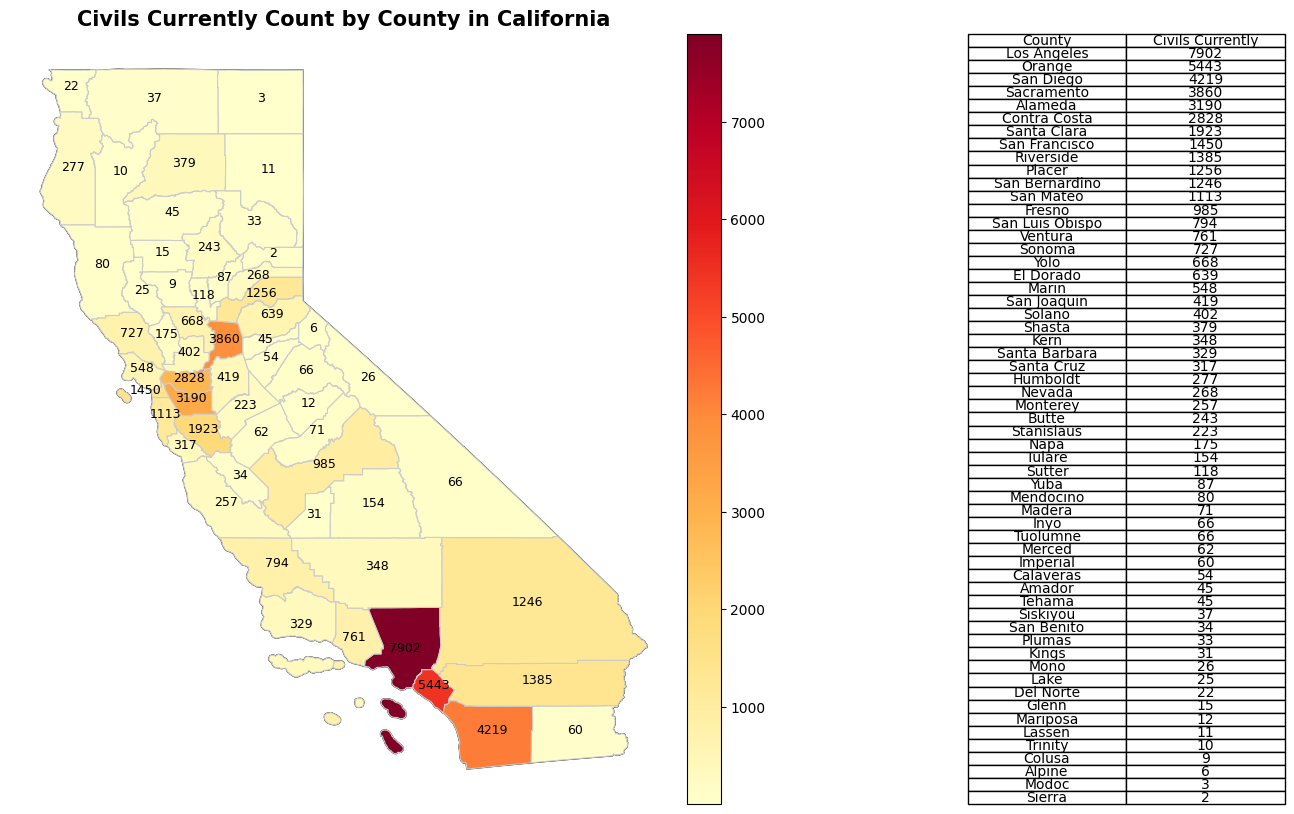

In [24]:
plot_count_map(california_counties_map, county_surveyor_counts, 'Civils Currently')

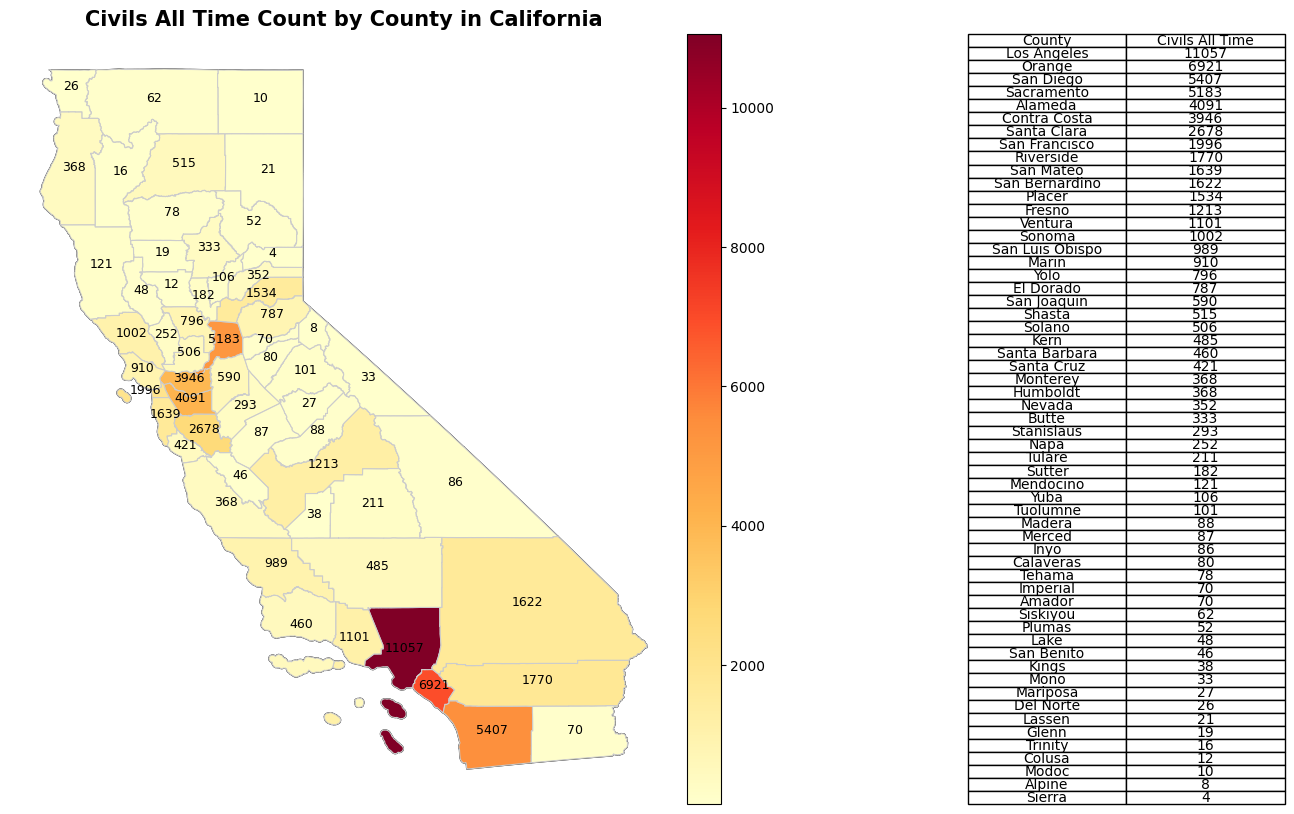

In [25]:
plot_count_map(california_counties_map, county_surveyor_counts_all_time, 'Civils All Time')

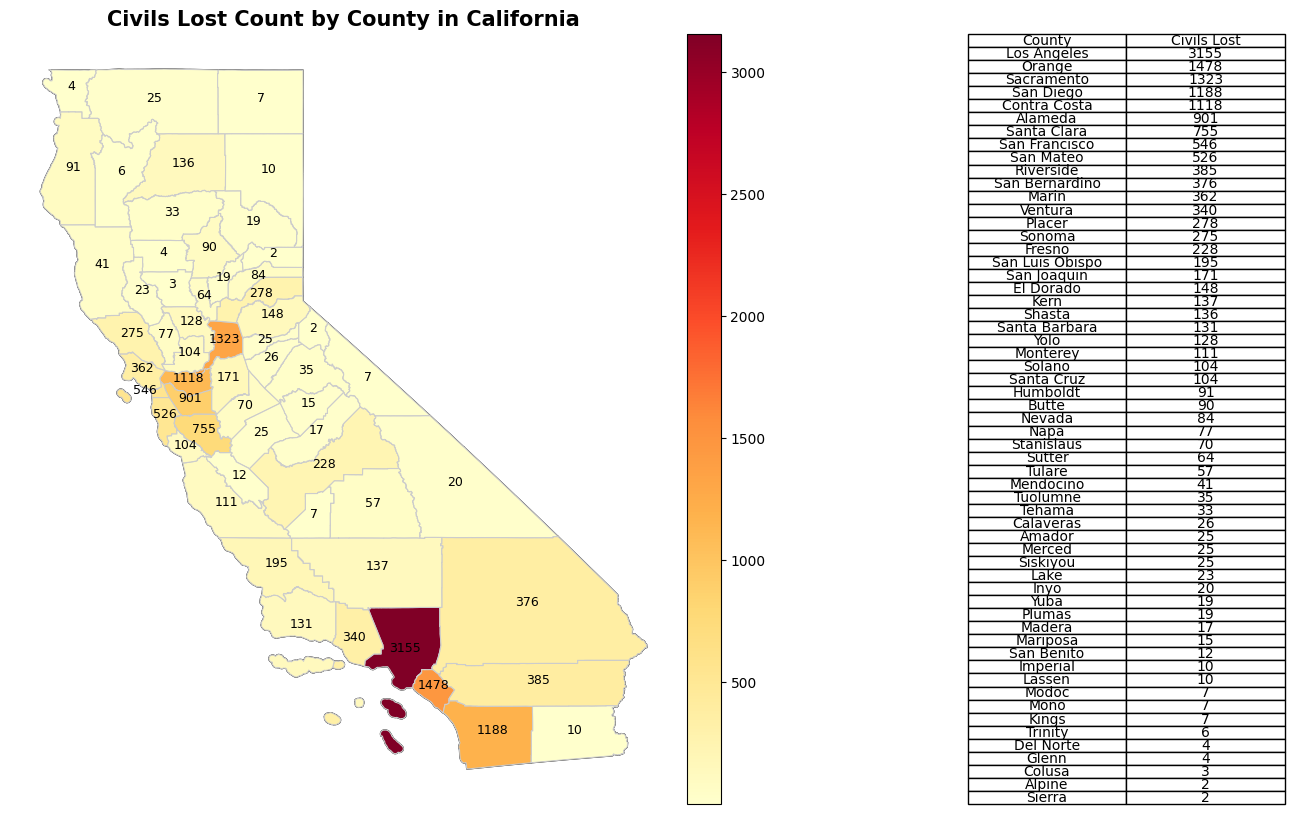

In [26]:
plot_count_map(california_counties_map, county_surveyor_counts_removed, 'Civils Lost')

In [27]:
def calculate_average_license_age_by_county(df, date_column='Original Issue Date', county_column='County'):
    # Convert 'Original Issue Date' to datetime
    df[date_column] = pd.to_datetime(df[date_column], errors='coerce')

    # Calculate the difference between today and the 'Original Issue Date' to get the age of licensure
    df['License Age'] = (datetime.now() - df[date_column]).dt.days

    # Convert days to years
    days_in_year = 365.25  # Accounting for leap years
    df['License Age'] = df['License Age'] / days_in_year

    # Group by county and calculate the average license age
    average_license_age_by_county = df.groupby(county_column)['License Age'].mean().reset_index()
    
    # Round the 'Average License Age' column to two decimal places
    average_license_age_by_county['Average License Age'] = average_license_age_by_county['License Age'].round(2)
    
    # Drop the intermediate 'License Age' column
    average_license_age_by_county = average_license_age_by_county.drop(columns='License Age')

    # Sort the DataFrame by county names
    average_license_age_by_county = average_license_age_by_county.sort_values(by=county_column).reset_index(drop=True)

    return average_license_age_by_county


In [28]:
ls_average_license_age_by_county = calculate_average_license_age_by_county(df_raw_ls)

C:\Users\James\AppData\Local\Temp\ipykernel_22900\4110610383.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df[date_column] = pd.to_datetime(df[date_column], errors='coerce')
C:\Users\James\AppData\Local\Temp\ipykernel_22900\4110610383.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['License Age'] = (datetime.now() - df[date_column]).dt.days
C:\Users\James\AppData\Local\Temp\ipykernel_22900\4110610383.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFra

In [29]:
def plot_age_map(geo_df, count_df, age_word, geo_column='NAME', count_column='County'):
    # Merge the surveyor counts DataFrame with the geographical data
    merged_data = geo_df.merge(count_df, left_on=geo_column, right_on=count_column)

    # print("Merged Data:\n", merged_data)  # Debug print

    if merged_data.empty:
        print("No data available for", age_word, "Average License Age.")
        return
    # Sort the DataFrame by 'Surveyor Count' in descending order
    merged_data = merged_data.sort_values(by='Average License Age', ascending=False)

    # Create a figure with two subplots (one for the map and one for the table)
    fig, (ax_map, ax_table) = plt.subplots(1, 2, figsize=(18, 10), gridspec_kw={'width_ratios': [3, 1]})
    
    cmap = "YlOrRd"  

    # Plot the background GeoDataFrame in grayscale
    geo_df.plot(ax=ax_map, color='gray', edgecolor='black')
    
    # Plot the map
    divider = make_axes_locatable(ax_map)
    cax = divider.append_axes("right", size="5%", pad=0.1)
    merged_data.plot(column='Average License Age', cmap=cmap, linewidth=0.8, ax=ax_map, edgecolor='0.8', legend=True, cax=cax)

    # Add annotations with surveyor counts
    for x, y, label in zip(merged_data.geometry.centroid.x, merged_data.geometry.centroid.y, merged_data['Average License Age']):
        ax_map.text(x, y, f'{label}', fontsize=9, ha='center', color='black')

    # Create a table for the legend
    legend_table = ax_table.table(cellText=merged_data[['NAME', 'Average License Age']].values,
                                colLabels=['County', f'{age_word} (Years)'],
                                cellLoc='center', loc='center', bbox=[0, 0, 1, 1])

    # Style the table
    legend_table.auto_set_font_size(False)
    legend_table.set_fontsize(10)

    # Add labels and title
    ax_map.set_title(f'{age_word} Average License Age by County in California (Years)', fontdict={'fontsize': 15, 'fontweight': 'bold'})
    ax_map.set_axis_off()

    # Remove axes for the table subplot
    ax_table.axis('off')

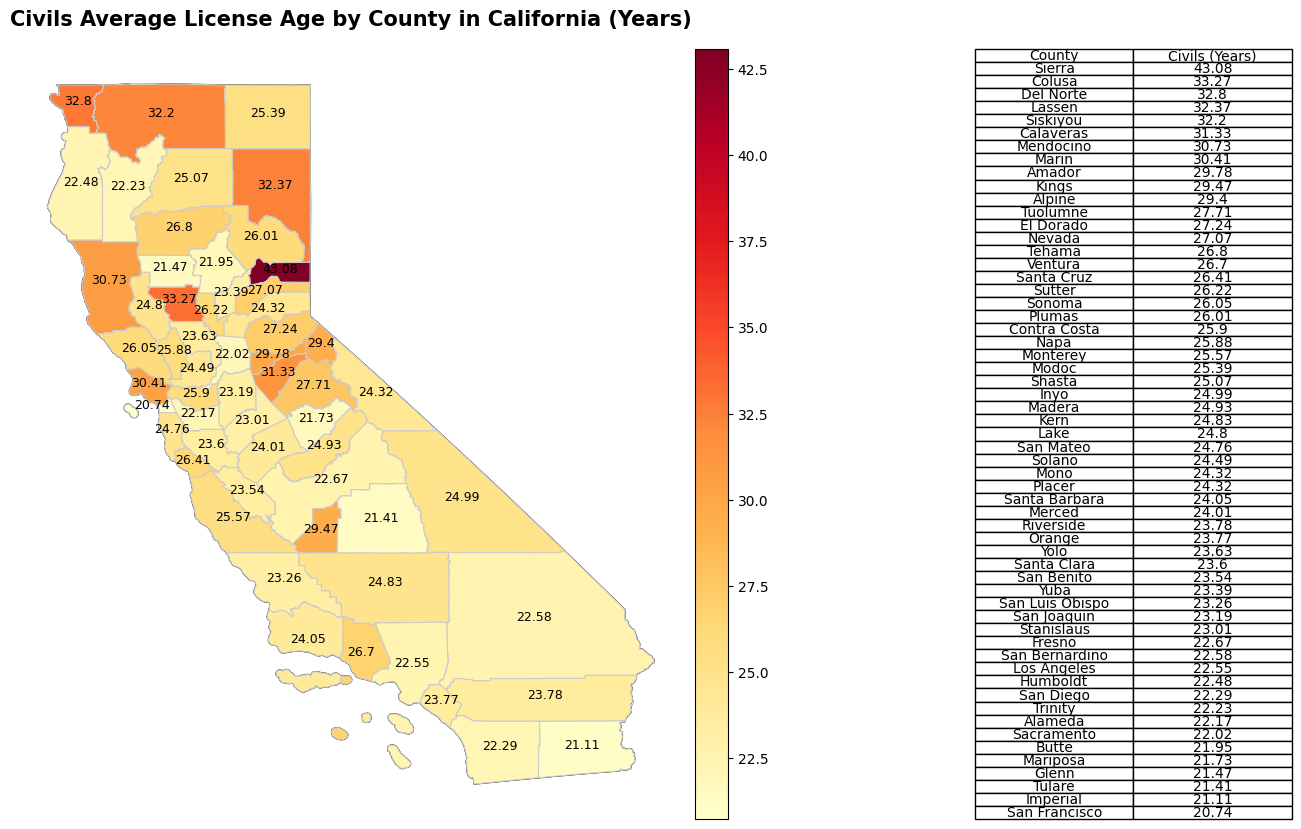

In [30]:
plot_age_map(california_counties_map, ls_average_license_age_by_county, 'Civils')

In [31]:
df_raw_ls_active.describe()

License Number            Original Issue Date   License Age
count    57233.000000                          57200  57200.000000
mean     63953.312163  2002-01-21 01:33:48.083916032     22.066899
min       8272.000000            1951-11-08 00:00:00      0.131417
25%      48714.000000            1992-06-26 00:00:00     10.715948
50%      65809.000000            2003-06-27 00:00:00     20.637919
75%      81180.000000            2013-05-29 00:00:00     31.638604
max      95856.000000            2023-12-29 00:00:00     72.271047
std      20348.424310                            NaN     13.777484

In [32]:
# def licenses_issued_per_year(df, date_column='Original Issue Date'):
#     # Convert 'Original Issue Date' to datetime
#     df[date_column] = pd.to_datetime(df[date_column], errors='coerce')

#     # Extract the year from the 'Original Issue Date'
#     df['Year'] = df[date_column].dt.year

#     # Count the occurrences of each year
#     licenses_per_year = df['Year'].value_counts().reset_index()
#     licenses_per_year.columns = ['Year', 'Number of Licenses Issued']

#     # Sort the DataFrame by year
#     licenses_per_year = licenses_per_year.sort_values(by='Year').reset_index(drop=True)

#     return licenses_per_year

In [33]:
def plot_licenses_per_year_with_moving_average(df, nameword, title, yaxis_name, date_column='Original Issue Date', window=10):
    # Convert 'Original Issue Date' to datetime
    df[date_column] = pd.to_datetime(df[date_column], errors='coerce')

    # Extract the year from the 'Original Issue Date'
    df['Year'] = df[date_column].dt.year

    # Get the current year and set the end year to the end of the last year
    current_year = datetime.now().year
    end_year = current_year - 1

    # Filter the DataFrame to include only data up to the end of the last year
    df = df[df['Year'] <= end_year]

    # Count the occurrences of each year
    licenses_per_year = df['Year'].value_counts().reset_index()
    licenses_per_year.columns = ['Year', 'Number of Licenses Issued']

    # Sort the DataFrame by year
    licenses_per_year = licenses_per_year.sort_values(by='Year').reset_index(drop=True)

    # Calculate the moving average
    licenses_per_year['Moving Average'] = licenses_per_year['Number of Licenses Issued'].rolling(window=window, min_periods=1).mean()

    # Plot the data
    plt.plot(licenses_per_year['Year'], licenses_per_year['Number of Licenses Issued'], marker='o', label='Number of Licenses Issued')
    plt.plot(licenses_per_year['Year'], licenses_per_year['Moving Average'], 'r--', label=f'Moving Average ({window}-period)')

    plt.title(f'{title}')
    plt.xlabel('Year')
    plt.ylabel(f'{yaxis_name}')
    plt.legend()
    plt.grid(True)
    plt.show()

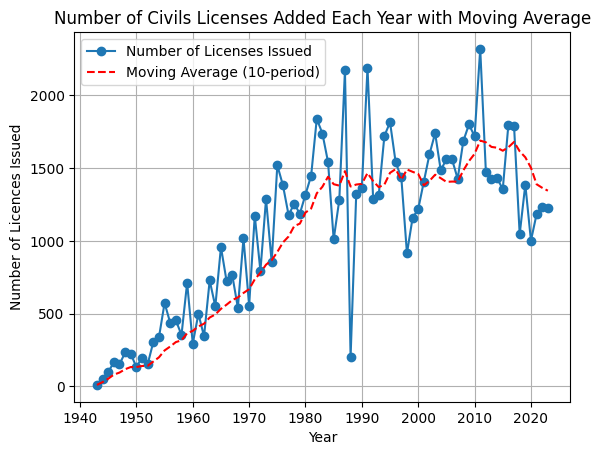

In [34]:
plot_licenses_per_year_with_moving_average(df_raw_all_with_secondary, "Civils", 'Number of Civils Licenses Added Each Year with Moving Average', "Number of Licences Issued")

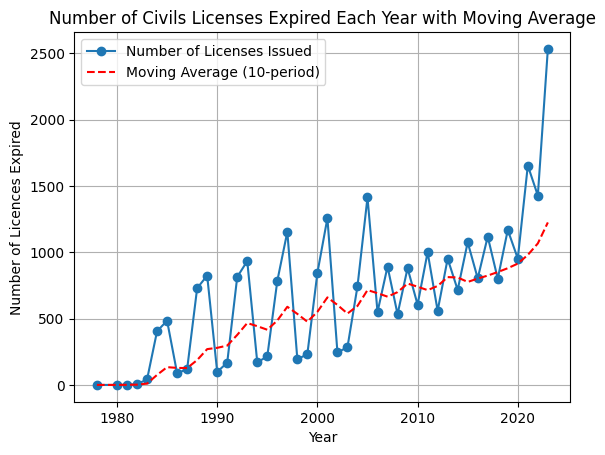

In [35]:
plot_licenses_per_year_with_moving_average(df_raw_all_with_secondary, "Civils", 'Number of Civils Licenses Expired Each Year with Moving Average', "Number of Licences Expired",  date_column='Expiration Date')

In [36]:
import pandas as pd
import matplotlib.pyplot as plt
from datetime import datetime

def plot_active_licenses_with_moving_average(df, nameword, issue_date_column, expiration_date_column, start_licenses, expire_years, window=10):
    # Convert date columns to datetime
    df[issue_date_column] = pd.to_datetime(df[issue_date_column], errors='coerce')
    df[expiration_date_column] = pd.to_datetime(df[expiration_date_column], errors='coerce')

    # Get the current year and set the end year to the end of the last year
    current_year = datetime.now().year
    end_year = current_year - 1

    # Create a range of years from the earliest issue date to the end of last year
    start_year = int(df[issue_date_column].dt.year.min())
    years = range(start_year, end_year + 1)  # +1 to include end_year in the range


    # Determine the yearly decrease in licenses
    yearly_decrease = start_licenses / expire_years

    # Function to count active licenses for a given year
    def count_active_licenses(year):
        initial_licenses = max(start_licenses - (year - start_year) * yearly_decrease, 0)
        issued_after_start = len(df[(df[issue_date_column].dt.year <= year) & (df[expiration_date_column].dt.year > year)])
        return initial_licenses + issued_after_start

    # Calculate active licenses for each year
    active_per_year = [count_active_licenses(year) for year in years]

    # Create DataFrame for plotting
    plot_data = pd.DataFrame({'Year': years, 'Active Licenses': active_per_year})

    # Calculate the moving average
    plot_data['Moving Average'] = plot_data['Active Licenses'].rolling(window=window, min_periods=1).mean()

    # Plot the data
    plt.plot(plot_data['Year'], plot_data['Active Licenses'], marker='o', label='Active Licenses')
    plt.plot(plot_data['Year'], plot_data['Moving Average'], 'r--', label=f'Moving Average ({window}-period)')

    plt.title(f'Number of Active {nameword} Licenses Each Year with Moving Average (Up to {end_year})')
    plt.xlabel('Year')
    plt.ylabel('Number of Active Licenses')
    plt.legend()
    plt.grid(True)
    plt.show()

# Example usage:
# plot_active_licenses_with_moving_average(df, 'Surveyor', 'Original Issue Date', 'Expiration Date', start_licenses=1000, expire_years=10)


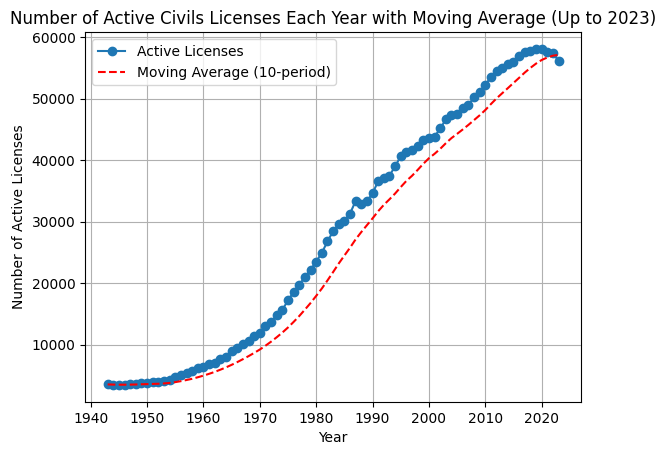

In [37]:
plot_active_licenses_with_moving_average(df_raw_all_with_secondary, "Civils", 'Original Issue Date', 'Expiration Date', start_licenses=3500, expire_years=30)

In [38]:
names = ['REVOKED', 'VOLUNTARY SURRENDER OF LICENSE', 'DENIED']  # Replace 'Name1', 'Name2', 'Name3' with the actual names you want to filter by
df_raw_ls_bad_apples = df_raw_all_with_secondary[df_raw_all_with_secondary['License Status'].isin(names)]

C:\Users\James\AppData\Local\Temp\ipykernel_22900\469537028.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df[date_column] = pd.to_datetime(df[date_column], errors='coerce')
C:\Users\James\AppData\Local\Temp\ipykernel_22900\469537028.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Year'] = df[date_column].dt.year


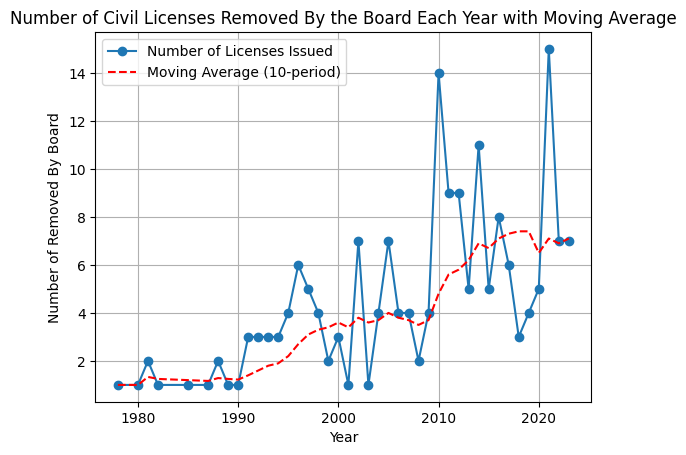

In [39]:
plot_licenses_per_year_with_moving_average(df_raw_ls_bad_apples, "Civils", 'Number of Civil Licenses Removed By the Board Each Year with Moving Average', "Number of Removed By Board",  date_column='Expiration Date')

C:\Users\James\AppData\Local\Temp\ipykernel_22900\688288071.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['County'] = df['County'].astype('category')
C:\Users\James\AppData\Local\Temp\ipykernel_22900\688288071.py:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['County'] = df['County'].fillna('out_of_state')


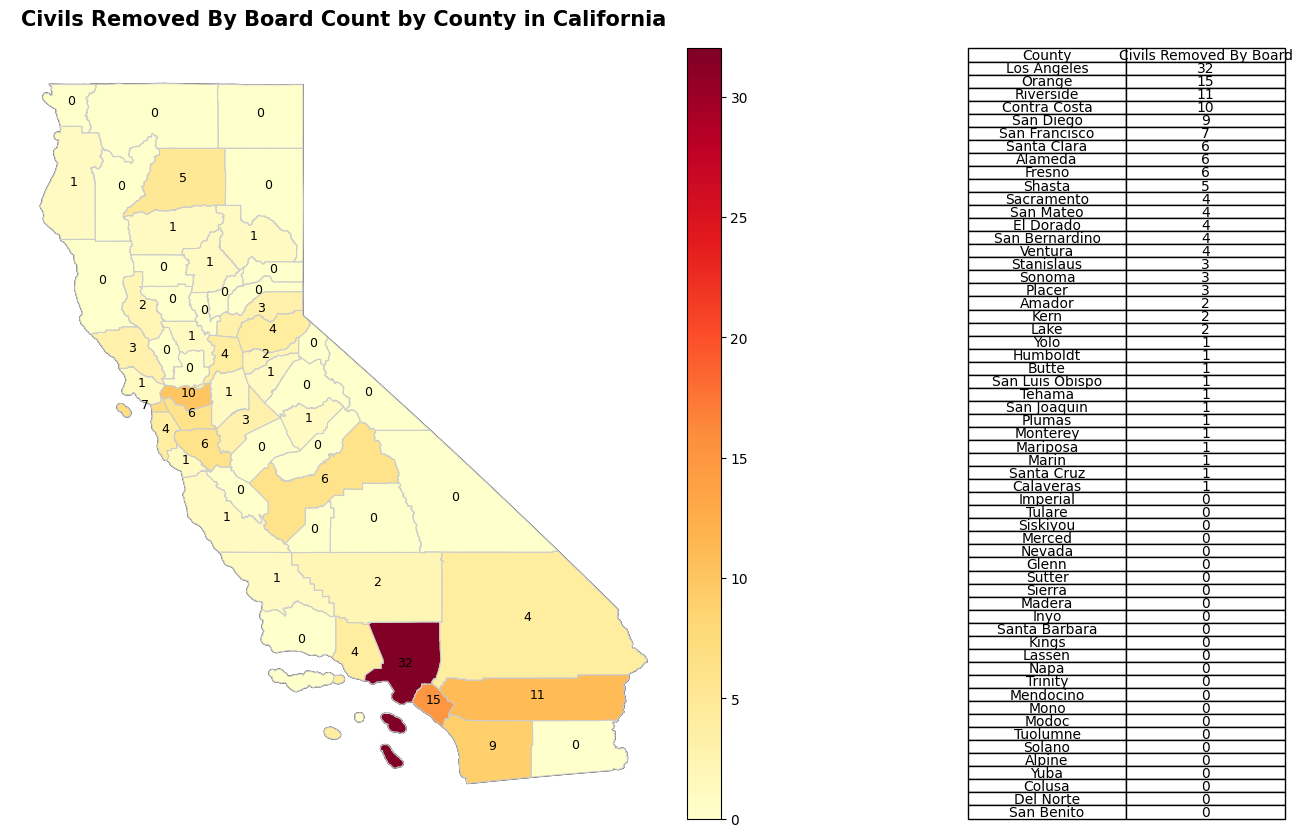

In [40]:
# names_to_remove = ['OUT OF COUNTRY', 'OUT OF STATE']  # Replace 'Name1', 'Name2', 'Name3' with the actual names you want to filter by
# df_raw_ls_bad_apples_clean = df_raw_ls_bad_apples[~df_raw_ls_bad_apples['County'].isin(names_to_remove)]
county_surveyor_counts_bad_apples = process_counts(df_raw_ls_bad_apples)
plot_count_map(california_counties_map, county_surveyor_counts_bad_apples, 'Civils Removed By Board')

In [41]:
import pandas as pd
import numpy as np
from datetime import datetime
import matplotlib.pyplot as plt
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression

def plot_active_licenses_with_projection_and_projected_table(df, nameword, issue_date_column, expiration_date_column, window=10, projection_years=10, degree=3):
    # Convert date columns to datetime
    df[issue_date_column] = pd.to_datetime(df[issue_date_column], errors='coerce')
    df[expiration_date_column] = pd.to_datetime(df[expiration_date_column], errors='coerce')
    df.to_csv("test123.csv")
    # Define the range for historical data from 1982 onwards
    start_year = 1982
    current_year = datetime.now().year
    historical_end_year = current_year - 1
    projection_end_year = current_year + projection_years
    historical_years = range(start_year, historical_end_year + 1)
    projection_years_range = range(current_year, projection_end_year + 1)

    # Function to count active licenses for a given year
    def count_active_licenses(year):
        return len(df[(df[issue_date_column].dt.year <= year) & (df[expiration_date_column].dt.year > year)])

    # Calculate active licenses for each year in the historical range
    active_per_year = [count_active_licenses(year) for year in historical_years]

    # Create DataFrame for historical data
    historical_data = pd.DataFrame({'Year': historical_years, 'Active Licenses': active_per_year})

    # Calculate the moving average for historical data
    historical_data['Moving Average'] = historical_data['Active Licenses'].rolling(window=window, min_periods=1).mean()

    # Fit a polynomial regression model to the moving average of historical data
    X = np.array(historical_years).reshape(-1, 1)
    y = historical_data['Moving Average'].values
    polynomial_features = PolynomialFeatures(degree=degree)
    X_poly = polynomial_features.fit_transform(X)
    model = LinearRegression().fit(X_poly, y)

    # Compute R² value
    r2_value = model.score(X_poly, y)

    # Calculate fitted values (trend line) for historical years
    fitted_values = model.predict(X_poly)
    historical_data['Fitted Trend Line'] = fitted_values

    # Calculate all errors
    historical_data['Error MA to Actual'] = np.abs(historical_data['Active Licenses'] - historical_data['Moving Average'])
    historical_data['Error Trend Line to Actual'] = np.abs(historical_data['Active Licenses'] - historical_data['Fitted Trend Line'])
    historical_data['Error MA to Trend Line'] = np.abs(historical_data['Moving Average'] - historical_data['Fitted Trend Line'])

    # Project the moving average for the next 10 years
    projection_X = np.array(list(projection_years_range)).reshape(-1, 1)
    projection_X_poly = polynomial_features.transform(projection_X)
    projection_Y = model.predict(projection_X_poly)

    # Combine historical and projection data for plotting and table
    all_years = list(historical_years) + list(projection_years_range)
    all_active_licenses = list(historical_data['Active Licenses']) + [np.nan] * len(projection_years_range)
    all_moving_averages = list(historical_data['Moving Average']) + [np.nan] * len(projection_years_range)
    all_fitted_values = list(fitted_values) + list(projection_Y)
    all_errors_ma = list(historical_data['Error MA to Actual']) + [np.nan] * len(projection_years_range)
    all_errors_trend = list(historical_data['Error Trend Line to Actual']) + [np.nan] * len(projection_years_range)
    all_errors_ma_to_trend = list(historical_data['Error MA to Trend Line']) + [np.nan] * len(projection_years_range)

    combined_data = pd.DataFrame({
        'Year': all_years,
        'Active Licenses': all_active_licenses,
        'Moving Average': all_moving_averages,
        'Fitted Trend Line/Projection': all_fitted_values,
        'Error MA to Actual': all_errors_ma,
        'Error Trend Line to Actual': all_errors_trend,
        'Error MA to Trend Line': all_errors_ma_to_trend
    })

    # Plotting
    fig, ax = plt.subplots(figsize=(12, 8))

    # Plot for historical and projected data
    ax.plot(combined_data['Year'], combined_data['Active Licenses'], marker='o', label='Active Licenses')
    ax.plot(combined_data['Year'], combined_data['Moving Average'], 'r--', label='Historical Moving Average')
    ax.plot(combined_data['Year'], combined_data['Fitted Trend Line/Projection'], 'g--', label='Fitted Trend Line / Projected Moving Average')
    ax.axvline(x=current_year, color='gray', linestyle=':', label='Start of Projection')
    ax.set_title(f'Number of Active {nameword} Licenses from 1982 Onwards with Projection')
    ax.set_xlabel('Year')
    ax.set_ylabel('Number of Active Licenses')
    ax.legend()
    ax.grid(True)

    # Displaying the data table from 1982 onwards, including projections
    plt.figure(figsize=(15, 8))
    table_data = combined_data[combined_data['Year'] >= 1982].round(2)
    table = plt.table(cellText=table_data.values, colLabels=table_data.columns, loc='center')
    table.auto_set_font_size(False)
    table.set_fontsize(10)
    table.scale(1.2, 1.2)
    plt.axis('off')

    plt.show()

    return r2_value

# This function now includes the error between the Moving Average and the Fitted Trend Line, giving a more nuanced view of the model's performance over time.


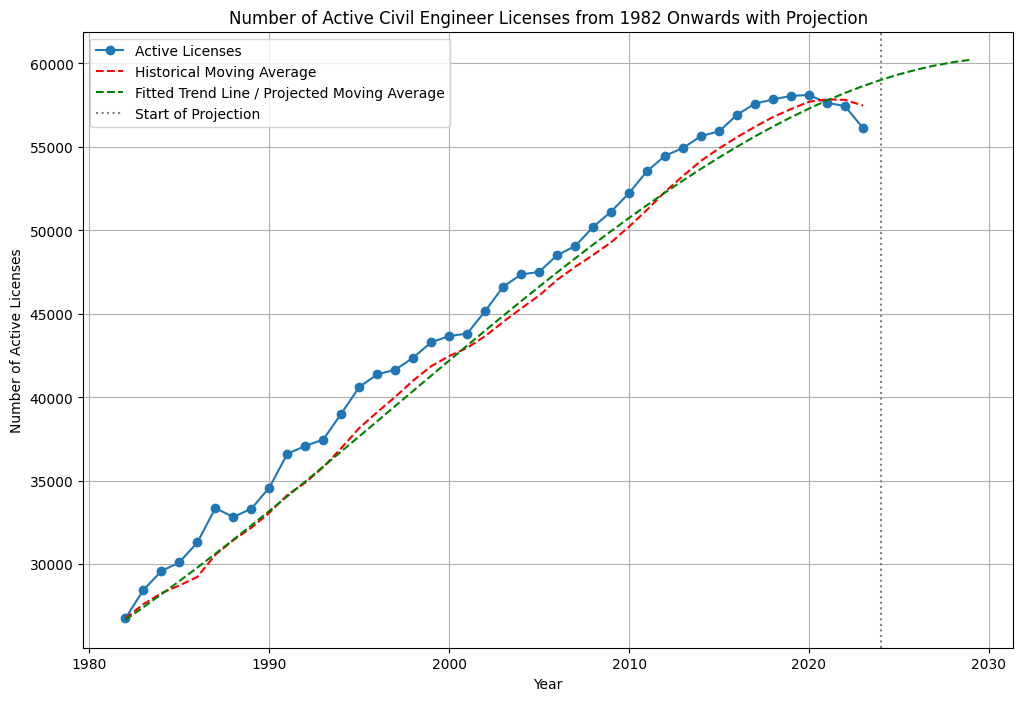

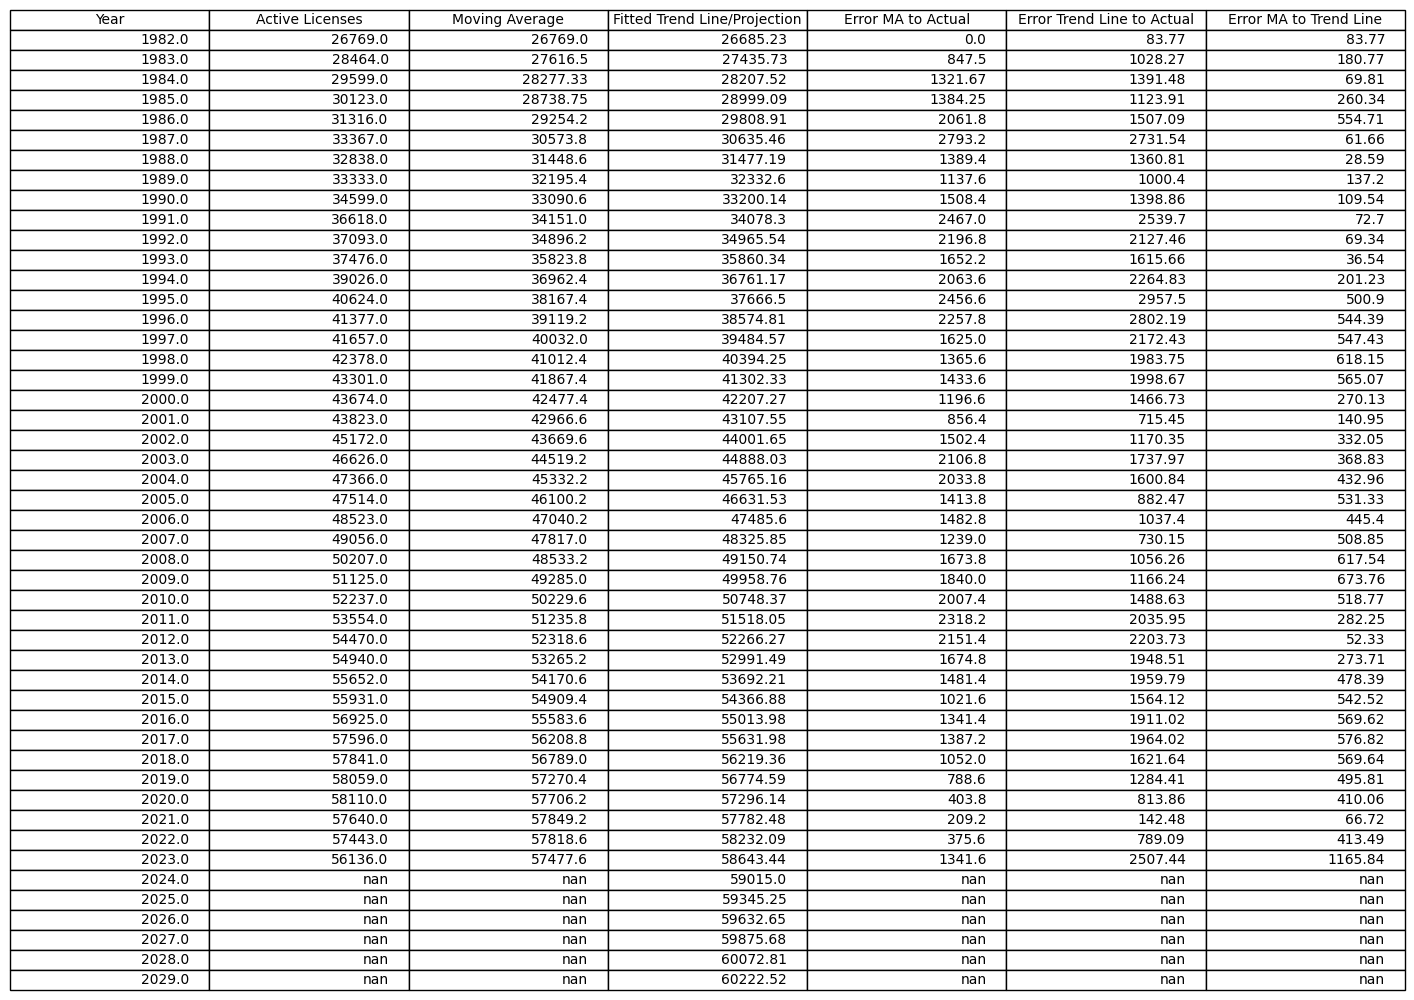

0.9980712840395339

In [45]:
plot_active_licenses_with_projection_and_projected_table(df_raw_all_with_secondary, "Civil Engineer", 'Original Issue Date', 'Expiration Date', window=5, projection_years=5, degree=3)

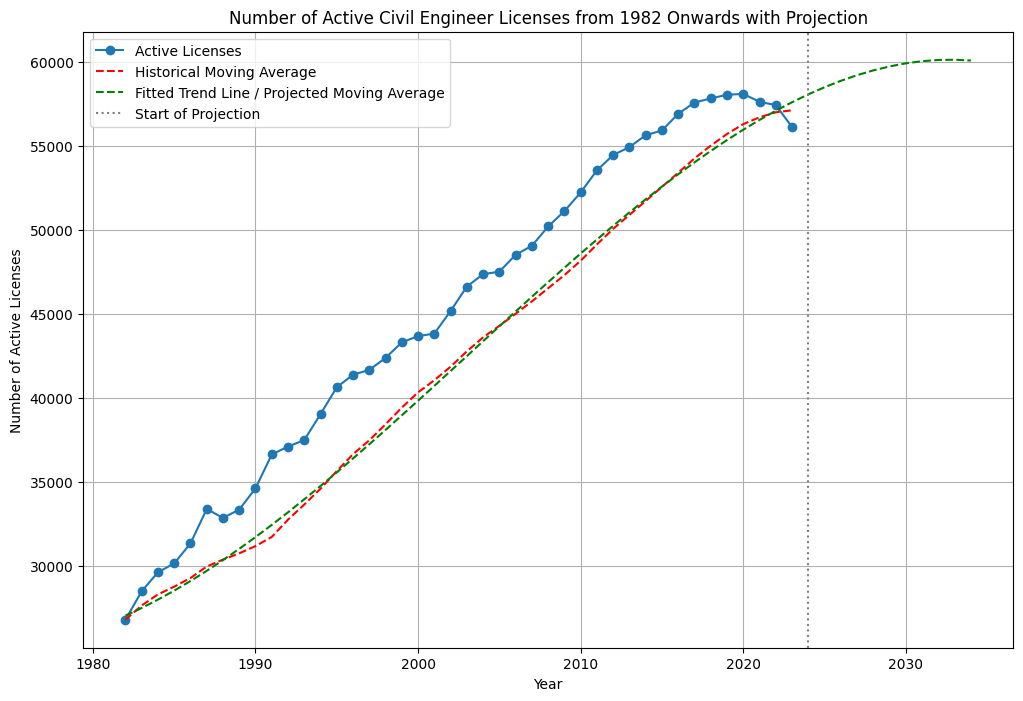

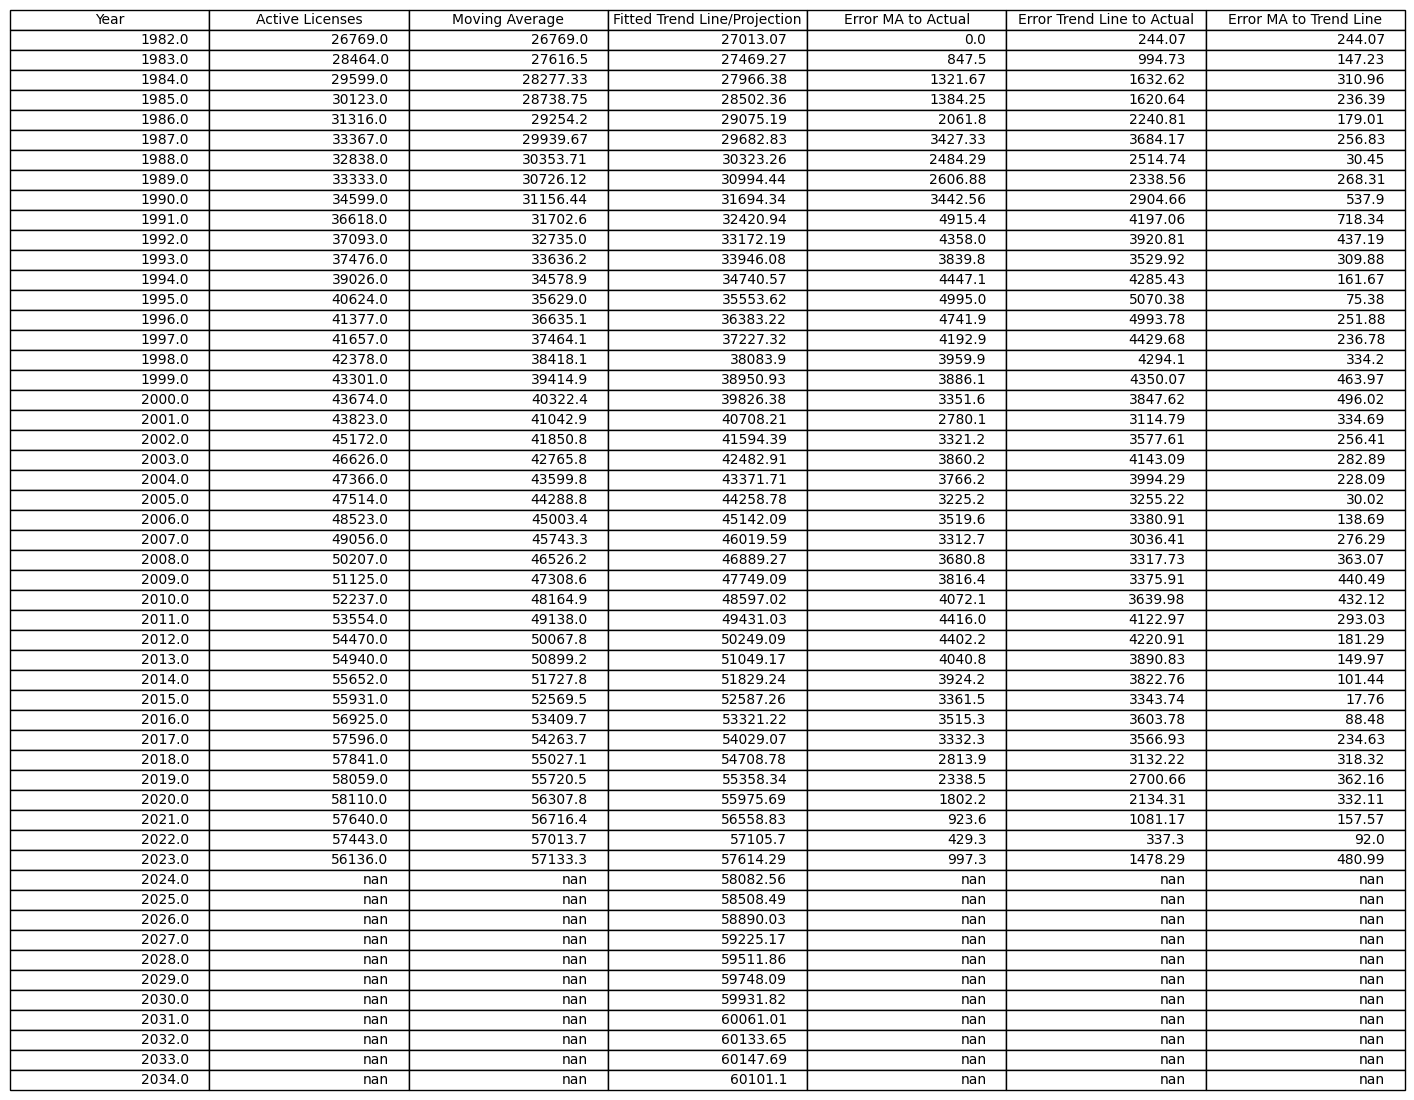

0.9989979674419879

In [44]:
plot_active_licenses_with_projection_and_projected_table(df_raw_all_with_secondary, "Civil Engineer", 'Original Issue Date', 'Expiration Date', window=10, projection_years=10, degree=3)

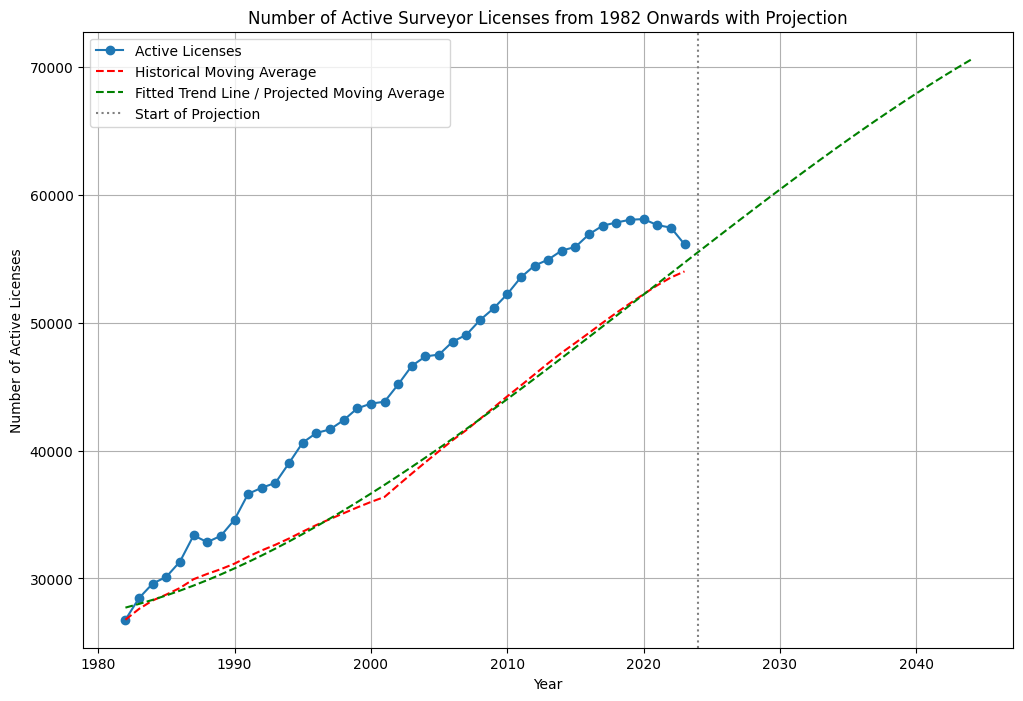

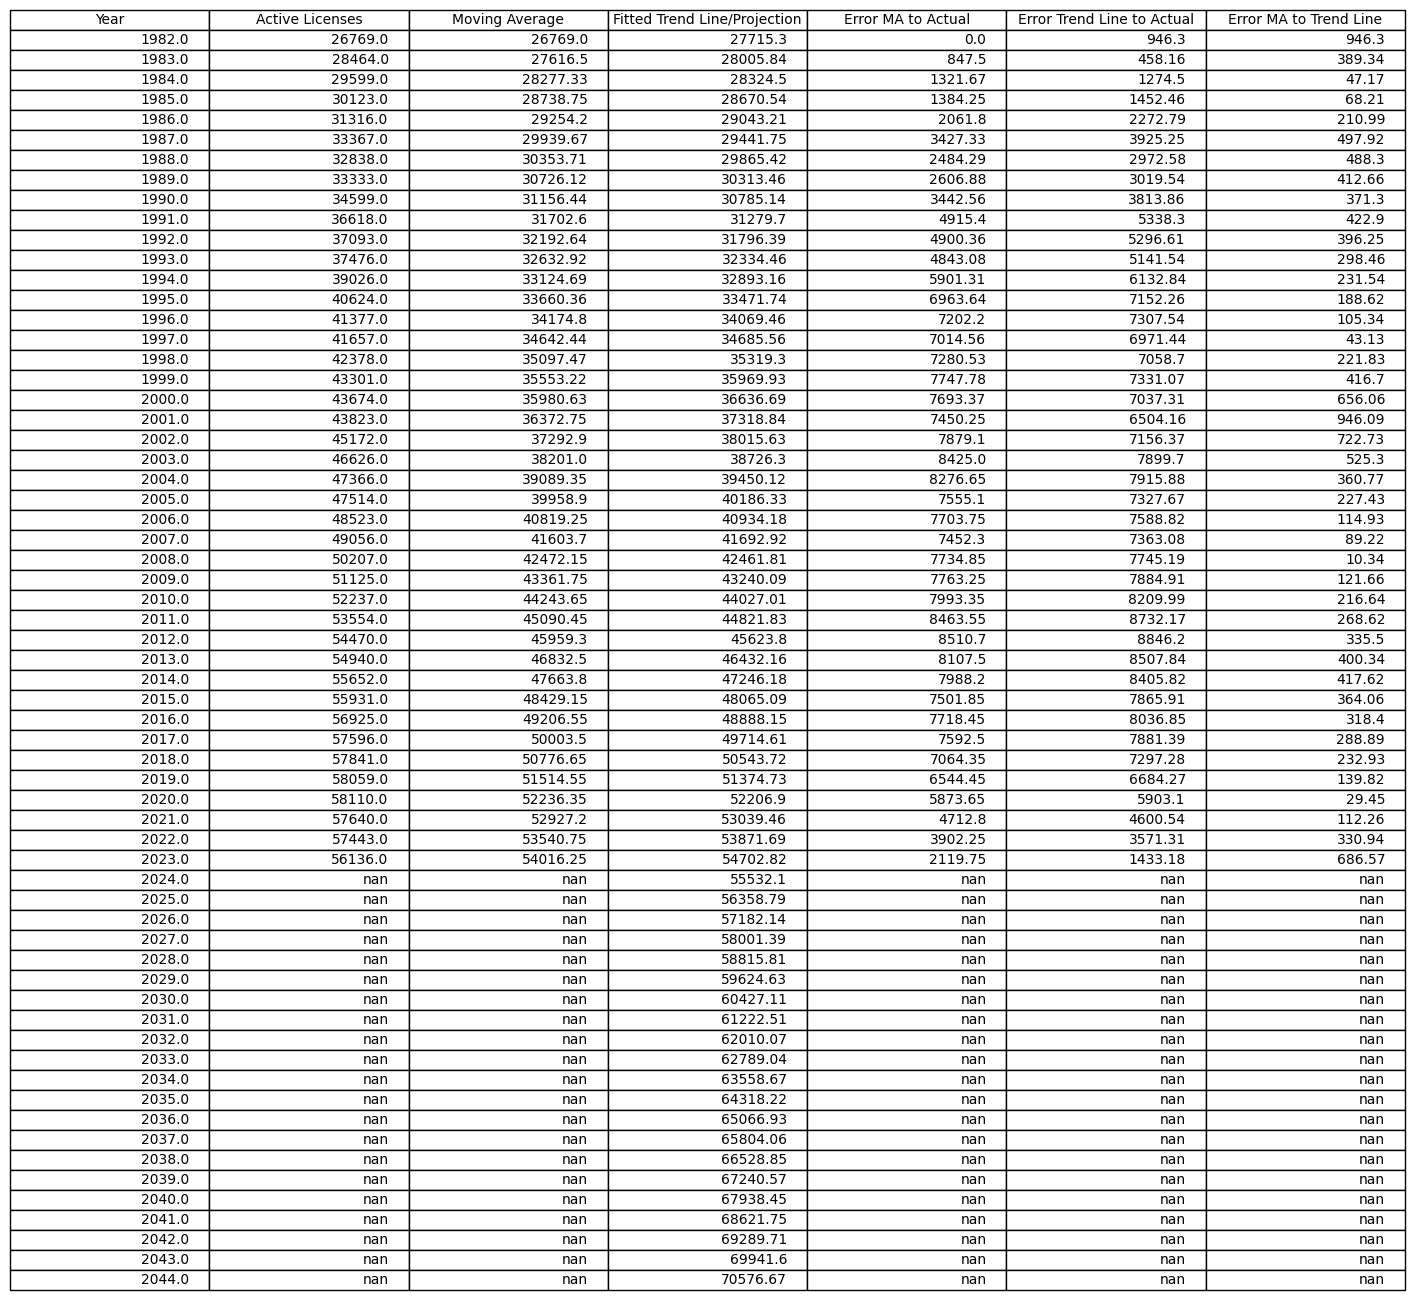

0.997726387355671

In [116]:
plot_active_licenses_with_projection_and_projected_table(df_raw_all_with_secondary, "Surveyor", 'Original Issue Date', 'Expiration Date', window=20, projection_years=20, degree=3)

In [46]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from datetime import datetime

def plot_license_distribution_with_details(df, issue_date_col, license_type_col, selected_license_type, num_categories):
    # Convert issue date column to datetime
    df[issue_date_col] = pd.to_datetime(df[issue_date_col], errors='coerce')

    # Filter data by selected license type
    df_filtered = df[df[license_type_col] == selected_license_type]

    # Calculate the age of each license from today
    df_filtered['License Age'] = datetime.now().year - df_filtered[issue_date_col].dt.year

    # Count licenses over 30 years of age
    licenses_over_30 = df_filtered[df_filtered['License Age'] > 30].shape[0]

    # Determine the range of license ages
    min_age = df_filtered['License Age'].min()
    max_age = df_filtered['License Age'].max()

    # Create age ranges for the categories
    age_ranges = np.linspace(min_age, max_age, num_categories + 1)

    # Categorize each license into an age group
    df_filtered['Age Group'] = pd.cut(df_filtered['License Age'], bins=age_ranges, include_lowest=True, right=False)

    # Group by age group, calculate count and get date range
    grouped = df_filtered.groupby('Age Group')
    age_distribution = grouped.size()
    date_ranges = grouped[issue_date_col].agg(['min', 'max'])

    # Merge count and date range data
    table_data = pd.DataFrame({
        'Age Group': age_distribution.index.categories,
        'Number of Licenses': age_distribution.values,
        'Issuance Date Range': date_ranges.apply(lambda x: f"{x['min'].date()} - {x['max'].date()}", axis=1)
    }).reset_index(drop=True)

    # Plotting bar chart and table
    fig, ax = plt.subplots(figsize=(18, 12))
    age_distribution.plot(kind='bar', ax=ax)
    ax.set_xlabel('License Age Groups (Years from Today)')
    ax.set_ylabel('Number of Licenses')
    ax.set_title(f'Distribution of {selected_license_type} Licenses by Age as of {datetime.now().date()}')
    ax.grid(True)

    # Annotate the total number of licenses over 30 years
    plt.text(0.95, 0.95, f'Number of licenses near retirement age (over 30 years of licensure): {licenses_over_30}',
             horizontalalignment='right', verticalalignment='top', transform=ax.transAxes, fontsize=10, color='red')

    # Creating table with actual values
    table = plt.table(cellText=table_data.values, colLabels=table_data.columns, loc='right', cellLoc='center')

    # Adjust layout to make room for table
    plt.subplots_adjust(right=0.7)
    plt.show()

# Example usage:
# plot_license_distribution_with_details(your_dataframe, 'issue_date_column_name', 'license_type_column_name', 'specific_license_type', num_categories=10)


C:\Users\James\AppData\Local\Temp\ipykernel_22900\3522482896.py:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_filtered['License Age'] = datetime.now().year - df_filtered[issue_date_col].dt.year
C:\Users\James\AppData\Local\Temp\ipykernel_22900\3522482896.py:27: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_filtered['Age Group'] = pd.cut(df_filtered['License Age'], bins=age_ranges, include_lowest=True, right=False)


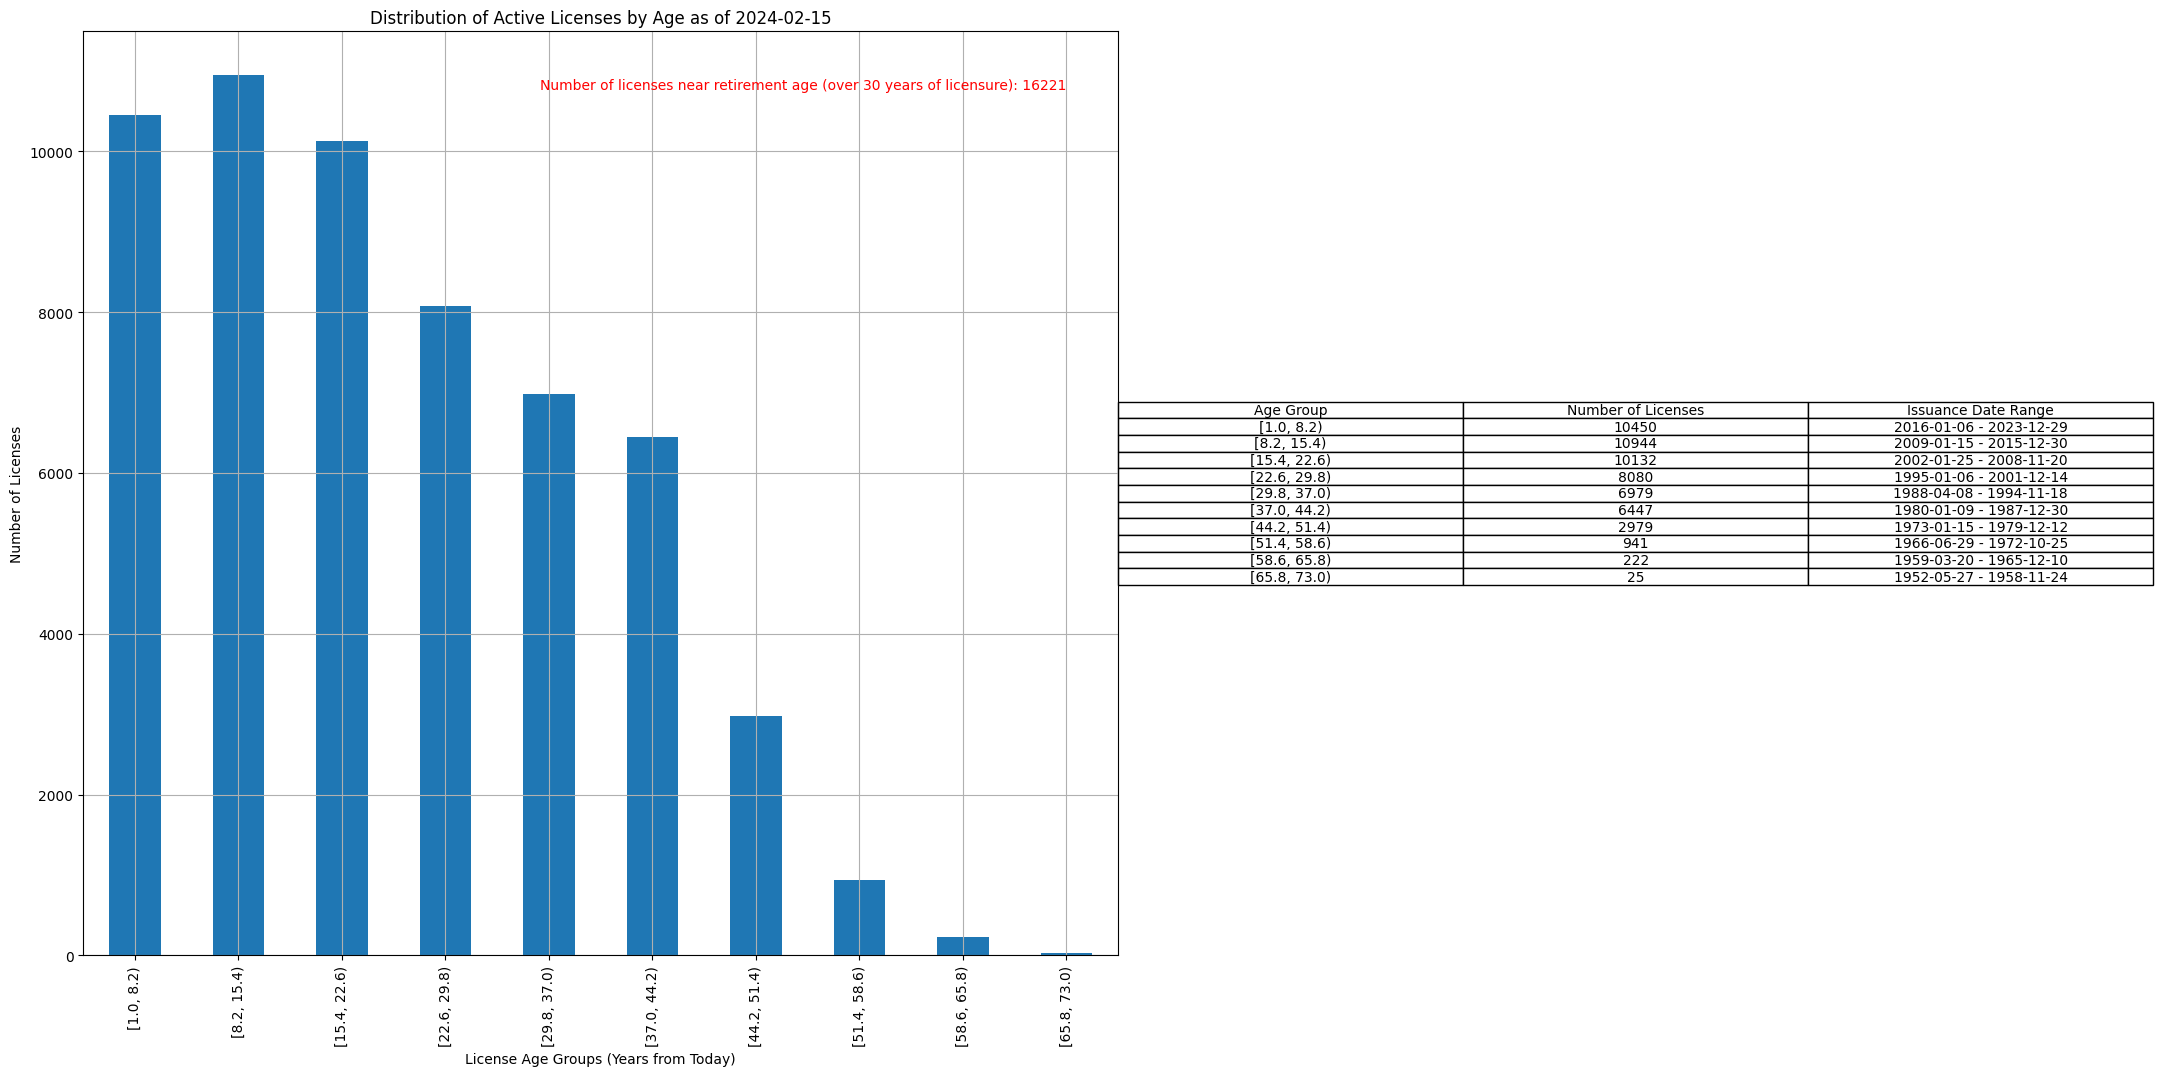

In [47]:
plot_license_distribution_with_details(df_raw_all_with_secondary, 'Original Issue Date', 'License Status', 'Active', num_categories=10)


In [103]:
import pandas as pd
import matplotlib.pyplot as plt
from datetime import datetime
import matplotlib.ticker as ticker

def plot_out_of_state_licenses_line_chart(df, issue_date_col, state_status_col, out_of_state_indicators):
    # Convert issue date column to datetime
    df[issue_date_col] = pd.to_datetime(df[issue_date_col], errors='coerce')

    # Filter out-of-state licenses
    out_of_state_df = df[df[state_status_col].isin(out_of_state_indicators)]

    # Extract year from issue date
    out_of_state_df['Issue Year'] = out_of_state_df[issue_date_col].dt.year

    # Count the number of out-of-state licenses issued each year
    yearly_distribution = out_of_state_df['Issue Year'].value_counts().sort_index()

    # Plotting line chart
    fig, ax = plt.subplots(figsize=(12, 6))
    ax.plot(yearly_distribution.index, yearly_distribution.values, marker='o', linestyle='-')

    # Formatting the plot
    ax.set_xlabel('Year')
    ax.set_ylabel('Number of Out-of-State Licenses')
    ax.set_title('Number of Out-of-State Licenses Issued Each Year (Current Address)')
    ax.grid(True)
    ax.xaxis.set_major_locator(ticker.MaxNLocator(integer=True))

    # # Adding table with actual values
    # table_data = yearly_distribution.reset_index()
    # table_data.columns = ['Year', 'Licenses']
    # table = plt.table(cellText=table_data.values, colLabels=table_data.columns, loc='right', cellLoc='center')

    # Adjust layout to make room for table
    plt.subplots_adjust(right=0.7)
    plt.show()

# Example usage:
# plot_out_of_state_licenses_line_chart(your_dataframe, 'issue_date_column_name', 'state_status_column_name', out_of_state_indicators_list)


C:\Users\James\AppData\Local\Temp\ipykernel_21404\2369415549.py:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  out_of_state_df['Issue Year'] = out_of_state_df[issue_date_col].dt.year


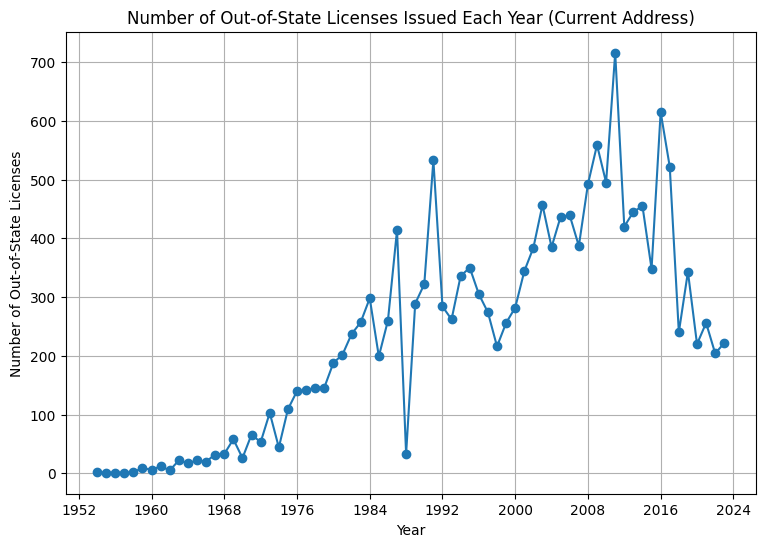

In [104]:

# Define new categories to be added
new_categories1 = ['out_of_state', 'OUT OF STATE', 'OUT OF COUNTRY']

plot_out_of_state_licenses_line_chart(df_raw_all_with_secondary, 'Original Issue Date', 'County', out_of_state_indicators=new_categories1)

In [105]:
import pandas as pd
import numpy as np
from datetime import datetime
import matplotlib.pyplot as plt

def plot_count_differences_with_moving_average(df, column1, column2, title, yaxis_name, window=10, ):
        # Convert date columns to datetime
    # Convert 'column1' and 'column2' to datetime
    df[column1] = pd.to_datetime(df[column1], errors='coerce')
    df[column2] = pd.to_datetime(df[column2], errors='coerce')

    # Extract the year from 'column1' and 'column2' for grouping
    df['Year1'] = df[column1].dt.year
    df['Year2'] = df[column2].dt.year
    df.to_csv("test1.csv")
    # Group the data by year and count the occurrences in each column
    grouped1 = df.groupby('Year1').agg({column1: 'count'})
    grouped2 = df.groupby('Year2').agg({column2: 'count'})

    # Merge the two grouped dataframes on the year and fill missing values
    merged = pd.merge(grouped1, grouped2, left_index=True, right_index=True, how='outer').fillna(0)

    # Get the end of the last year
    end_of_last_year = datetime.now().year - 1

    # Filter the data to include only up to the end of the last year
    merged = merged[merged.index <= end_of_last_year]

    # Calculate the yearly difference
    merged['Yearly Difference'] = merged[column1] - merged[column2]

    # Calculate the moving average
    merged['Moving Average'] = merged['Yearly Difference'].rolling(window=window, min_periods=1).mean()
    merged.to_csv("test.csv")
    # Plot the data
    plt.figure(figsize=(12, 6))
    plt.plot(merged.index, merged['Yearly Difference'], marker='o', label='Yearly Difference')
    plt.plot(merged.index, merged['Moving Average'], linestyle='--', color='red', label=f'{window}-Year Moving Average')

    plt.title(title)
    plt.xlabel('Year')
    plt.ylabel(yaxis_name)
    plt.legend()
    plt.grid(True)
    plt.show()


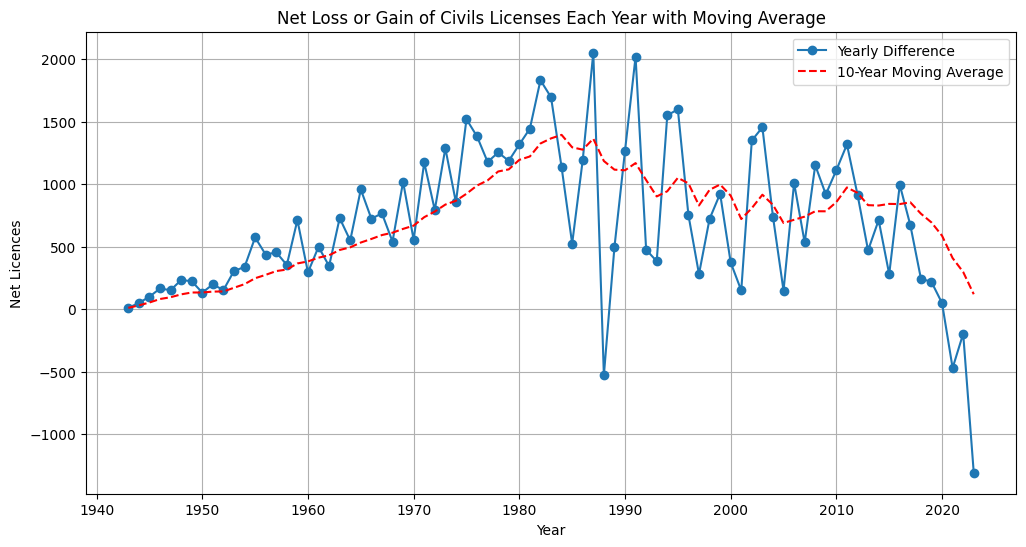

In [117]:
plot_count_differences_with_moving_average(df_raw_all_with_secondary,'Original Issue Date', 'Expiration Date','Net Loss or Gain of Civils Licenses Each Year with Moving Average', 'Net Licences')

In [107]:
def plot_yearly_differences_with_projection(df, column1, column2, nameword, window=10, projection_years=10, degree=3):
    # Convert 'column1' and 'column2' to datetime and extract years
    df[column1] = pd.to_datetime(df[column1], errors='coerce').dt.year
    df[column2] = pd.to_datetime(df[column2], errors='coerce').dt.year

    # Group by year and count occurrences
    grouped1 = df.groupby(column1).size()
    grouped2 = df.groupby(column2).size()

    # Merge and calculate yearly differences
    yearly_data = pd.merge(grouped1, grouped2, left_index=True, right_index=True, how='outer').fillna(0)
    yearly_data['Yearly Difference'] = yearly_data[column1] - yearly_data[column2]

    # Calculate moving average
    yearly_data['Moving Average'] = yearly_data['Yearly Difference'].rolling(window=window, min_periods=1).mean()

    # Fit polynomial regression
    current_year = datetime.now().year
    historical_years = yearly_data.index
    X = np.array(historical_years).reshape(-1, 1)
    y = yearly_data['Moving Average'].values
    polynomial_features = PolynomialFeatures(degree=degree)
    X_poly = polynomial_features.fit_transform(X)
    model = LinearRegression().fit(X_poly, y)

    # Project future values
    projection_end_year = current_year + projection_years
    projection_years_range = range(current_year, projection_end_year + 1)
    projection_X = np.array(list(projection_years_range)).reshape(-1, 1)
    projection_X_poly = polynomial_features.transform(projection_X)
    projection_Y = model.predict(projection_X_poly)

    # Combine historical and projected values for plotting
    all_years = list(historical_years) + list(projection_years_range)
    all_fitted_values = list(model.predict(X_poly)) + list(projection_Y)
    combined_data = pd.DataFrame({'Year': all_years, 'Yearly Difference': yearly_data['Yearly Difference'], 
                                  'Moving Average': yearly_data['Moving Average'], 
                                  'Fitted Trend Line/Projection': all_fitted_values})

    # Plotting
    plt.figure(figsize=(12, 6))
    plt.plot(combined_data['Year'], combined_data['Yearly Difference'], marker='o', label='Yearly Difference')
    plt.plot(combined_data['Year'], combined_data['Moving Average'], linestyle='--', color='red', label='Moving Average')
    plt.plot(combined_data['Year'], combined_data['Fitted Trend Line/Projection'], linestyle='-', color='green', label='Fitted Trend Line / Projection')
    plt.axvline(x=current_year, color='gray', linestyle=':', label='Start of Projection')
    plt.title(f'{nameword} Yearly Differences with Historical Data and Polynomial Projection')
    plt.xlabel('Year')
    plt.ylabel('Yearly Difference')
    plt.legend()
    plt.grid(True)
    plt.show()

    # Return R² value of the model
    return model.score(X_poly, y)


In [50]:
# plot_yearly_differences_with_projection(df_raw_all_with_secondary,'Original Issue Date', 'Expiration Date','Surveyors', window=10, projection_years=10, degree=3)

In [111]:
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression
from datetime import datetime

def plot_net_gain_loss_of_surveyors_with_errors(df, nameword, issue_date_column, expiration_date_column, window=10, projection_years=10, degree=3):
    # Convert date columns to datetime
    df[issue_date_column] = pd.to_datetime(df[issue_date_column], errors='coerce')
    df[expiration_date_column] = pd.to_datetime(df[expiration_date_column], errors='coerce')

    # Define the range for historical data and future projection
    start_year = 1960
    current_year = datetime.now().year
    historical_end_year = current_year - 1
    projection_end_year = current_year + projection_years
    historical_years = range(start_year, historical_end_year + 1)
    projection_years_range = range(current_year, projection_end_year + 1)

    # Function to count issued and expired licenses for a given year
    def count_issued(year):
        return df[df[issue_date_column].dt.year == year].shape[0]

    def count_expired(year):
        return df[df[expiration_date_column].dt.year == year].shape[0]

    # Calculate issued and expired licenses for each year in the historical range
    net_gain_loss_per_year = {}
    for year in historical_years:
        issued = count_issued(year)
        expired = count_expired(year)
        net_gain_loss_per_year[year] = issued - expired

    # Create DataFrame for historical data
    historical_data = pd.DataFrame(list(net_gain_loss_per_year.items()), columns=['Year', 'Net Gain/Loss'])

    # Calculate the moving average for net gain/loss
    historical_data['Moving Average'] = historical_data['Net Gain/Loss'].rolling(window=window, min_periods=1).mean()

    # Fit a polynomial regression model to the moving average of net gain/loss
    X = historical_data['Year'].values.reshape(-1, 1)
    y = historical_data['Moving Average'].values
    polynomial_features = PolynomialFeatures(degree=degree)
    X_poly = polynomial_features.fit_transform(X)
    model = LinearRegression().fit(X_poly, y)

    # Compute R² value
    r2_value = model.score(X_poly, y)

    # Calculate fitted values (trend line) for historical years
    fitted_values = model.predict(X_poly)
    historical_data['Fitted Trend Line'] = fitted_values

    # Calculate errors
    historical_data['Error MA to Actual'] = np.abs(historical_data['Net Gain/Loss'] - historical_data['Moving Average'])
    historical_data['Error Trend Line to Actual'] = np.abs(historical_data['Net Gain/Loss'] - historical_data['Fitted Trend Line'])

    # Project the moving average for the next 10 years
    projection_X = np.array(list(projection_years_range)).reshape(-1, 1)
    projection_X_poly = polynomial_features.transform(projection_X)
    projection_Y = model.predict(projection_X_poly)

    # Ensure all arrays are of the same length
    all_years = list(historical_years) + list(projection_years_range)
    all_net_gain_loss = list(historical_data['Net Gain/Loss']) + [np.nan] * len(projection_years_range)
    all_moving_averages = list(historical_data['Moving Average']) + [np.nan] * len(projection_years_range)
    all_fitted_values = list(fitted_values) + list(projection_Y)
    all_errors_MA = list(historical_data['Error MA to Actual']) + [np.nan] * len(projection_years_range)
    all_errors_trend = list(historical_data['Error Trend Line to Actual']) + [np.nan] * len(projection_years_range)

    # Combine into a DataFrame
    combined_data = pd.DataFrame({
        'Year': all_years,
        'Net Gain/Loss': all_net_gain_loss,
        'Moving Average': all_moving_averages,
        'Fitted Trend Line/Projection': all_fitted_values,
        'Error MA to Actual': all_errors_MA,
        'Error Trend Line to Actual': all_errors_trend
    })

    # Plotting the Graph
    fig, ax = plt.subplots(figsize=(12, 8))
    ax.plot(combined_data['Year'], combined_data['Net Gain/Loss'], marker='o', label='Net Gain/Loss')
    ax.plot(combined_data['Year'], combined_data['Moving Average'], 'r--', label='Moving Average')
    ax.plot(combined_data['Year'], combined_data['Fitted Trend Line/Projection'], 'g--', label='Projected Trend')
    ax.axvline(x=current_year, color='gray', linestyle=':', label='Start of Projection')
    ax.set_title(f'Yearly Net Gain/Loss of {nameword} Licenses from {start_year} Onwards with Projection')
    ax.set_xlabel('Year')
    ax.set_ylabel('Net Gain/Loss')
    ax.legend()
    ax.grid(True)
    plt.show()

    # Plotting the Table
    fig, ax_table = plt.subplots(figsize=(12, 8))  # Adjust size as needed
    ax_table.axis('tight')
    ax_table.axis('off')
    table_data = combined_data.round(2)
    table = ax_table.table(cellText=table_data.values, colLabels=table_data.columns, loc='center')
    table.auto_set_font_size(False)
    table.set_fontsize(10)
    table.scale(1.2, 1.2)
    plt.show()

    return r2_value

# This function now includes error calculations and a better layout for the plot and table.


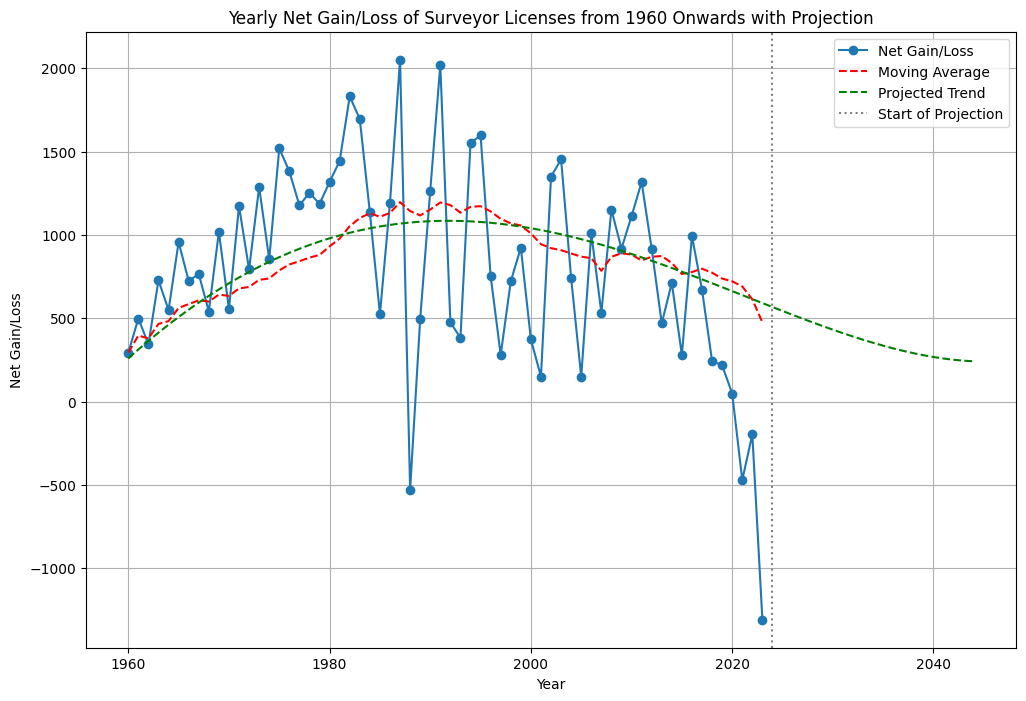

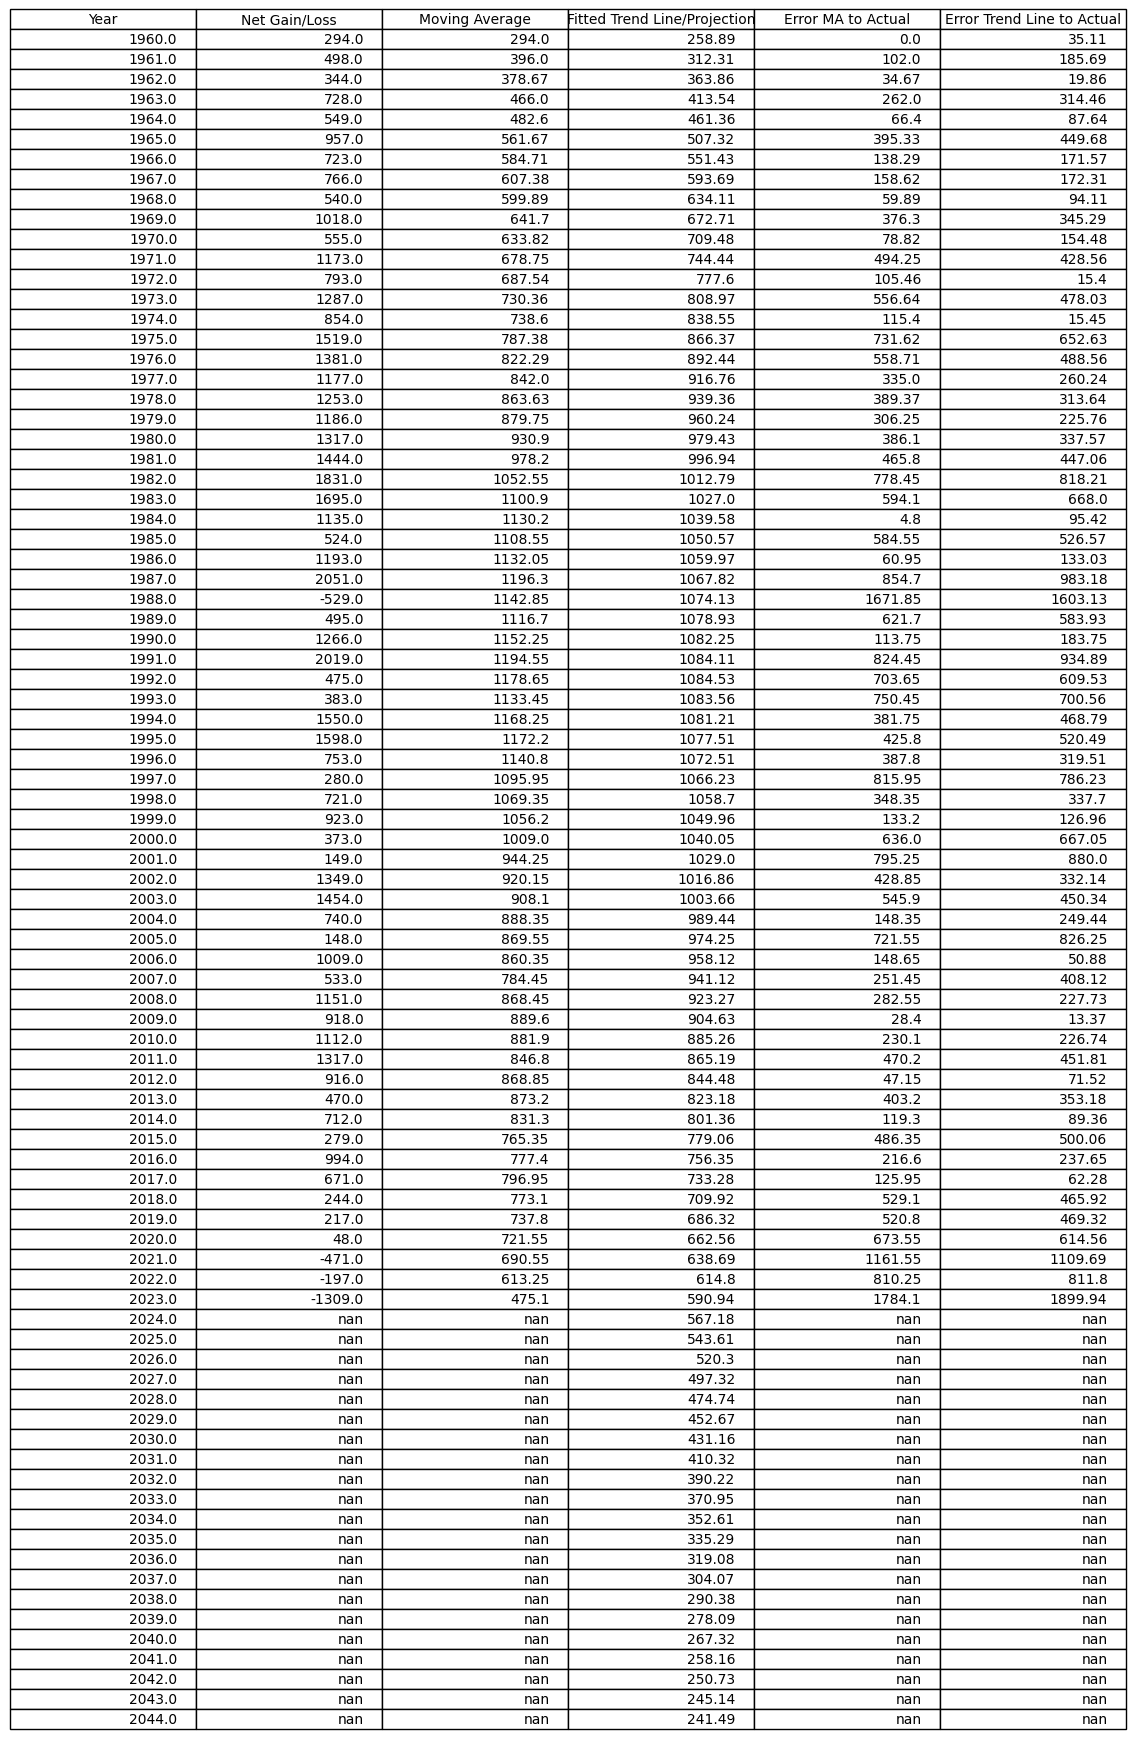

0.9076568778680956

In [115]:
plot_net_gain_loss_of_surveyors_with_errors(df_raw_all_with_secondary,'Surveyor', 'Original Issue Date', 'Expiration Date', window=20, projection_years=20, degree=20)

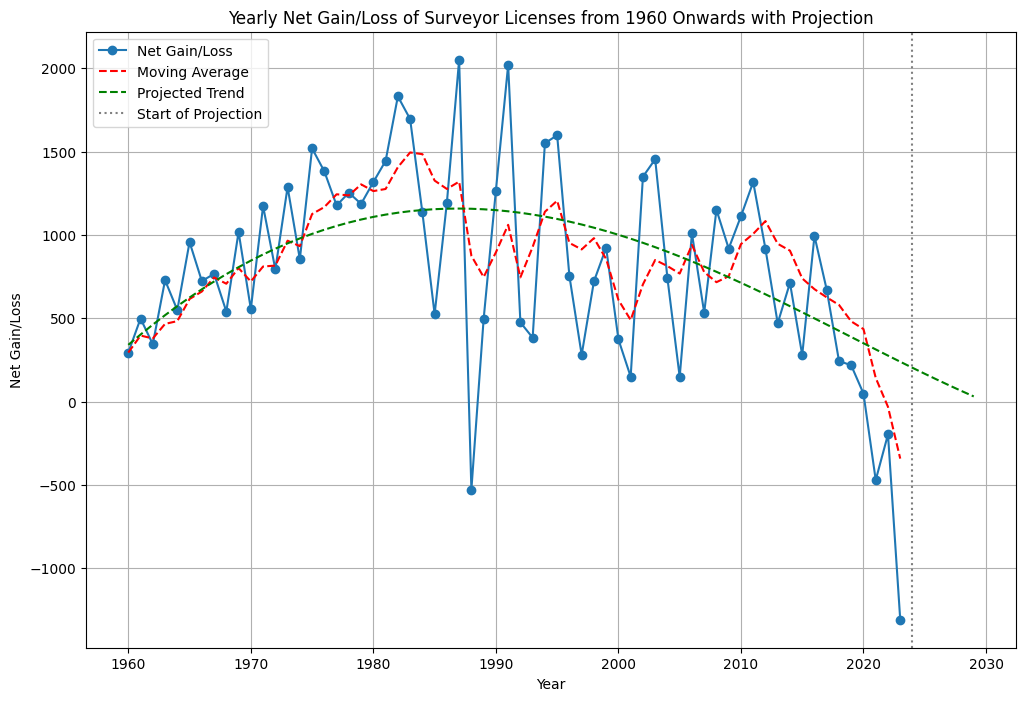

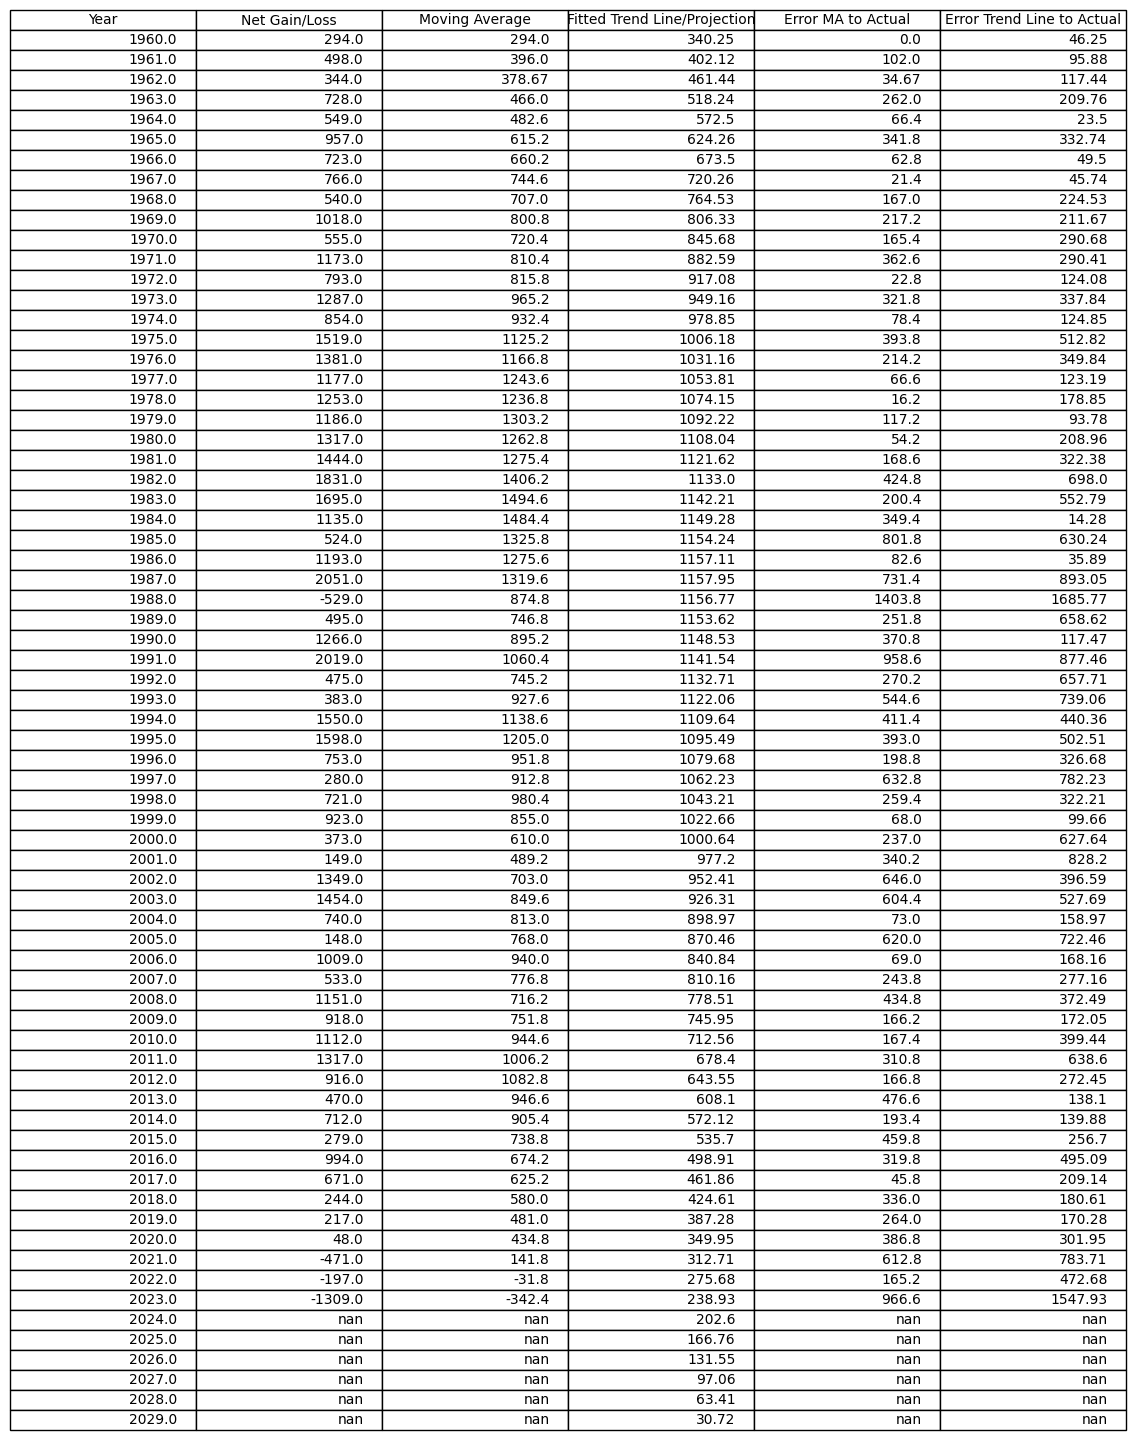

0.6309822647796846

In [113]:
plot_net_gain_loss_of_surveyors_with_errors(df_raw_all_with_secondary,'Surveyor', 'Original Issue Date', 'Expiration Date', window=5, projection_years=5, degree=20)

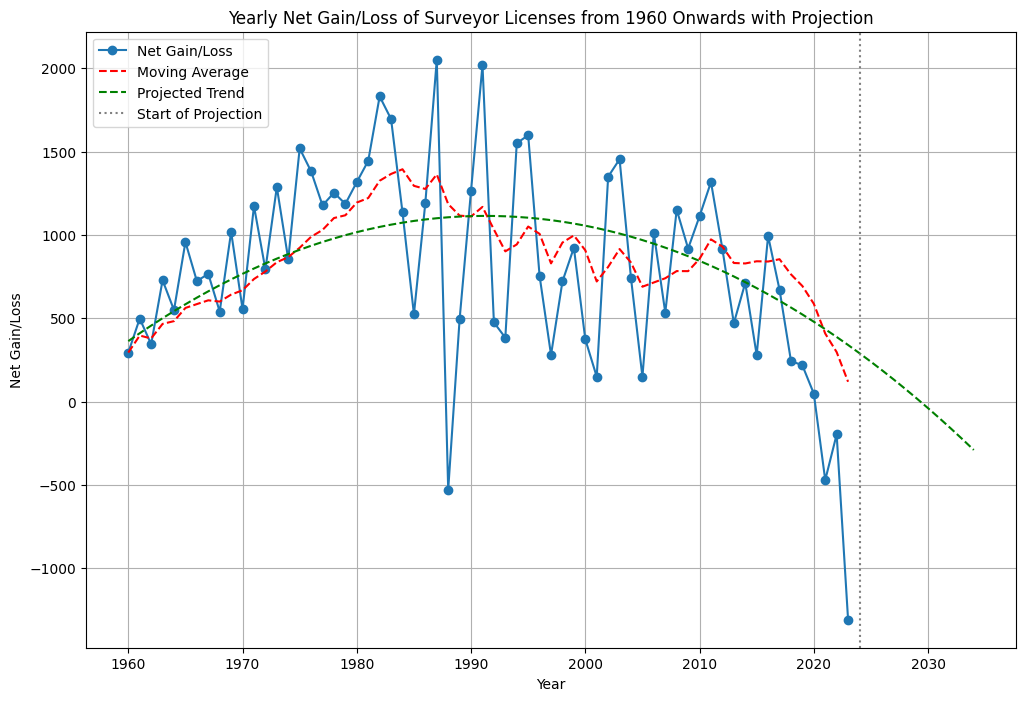

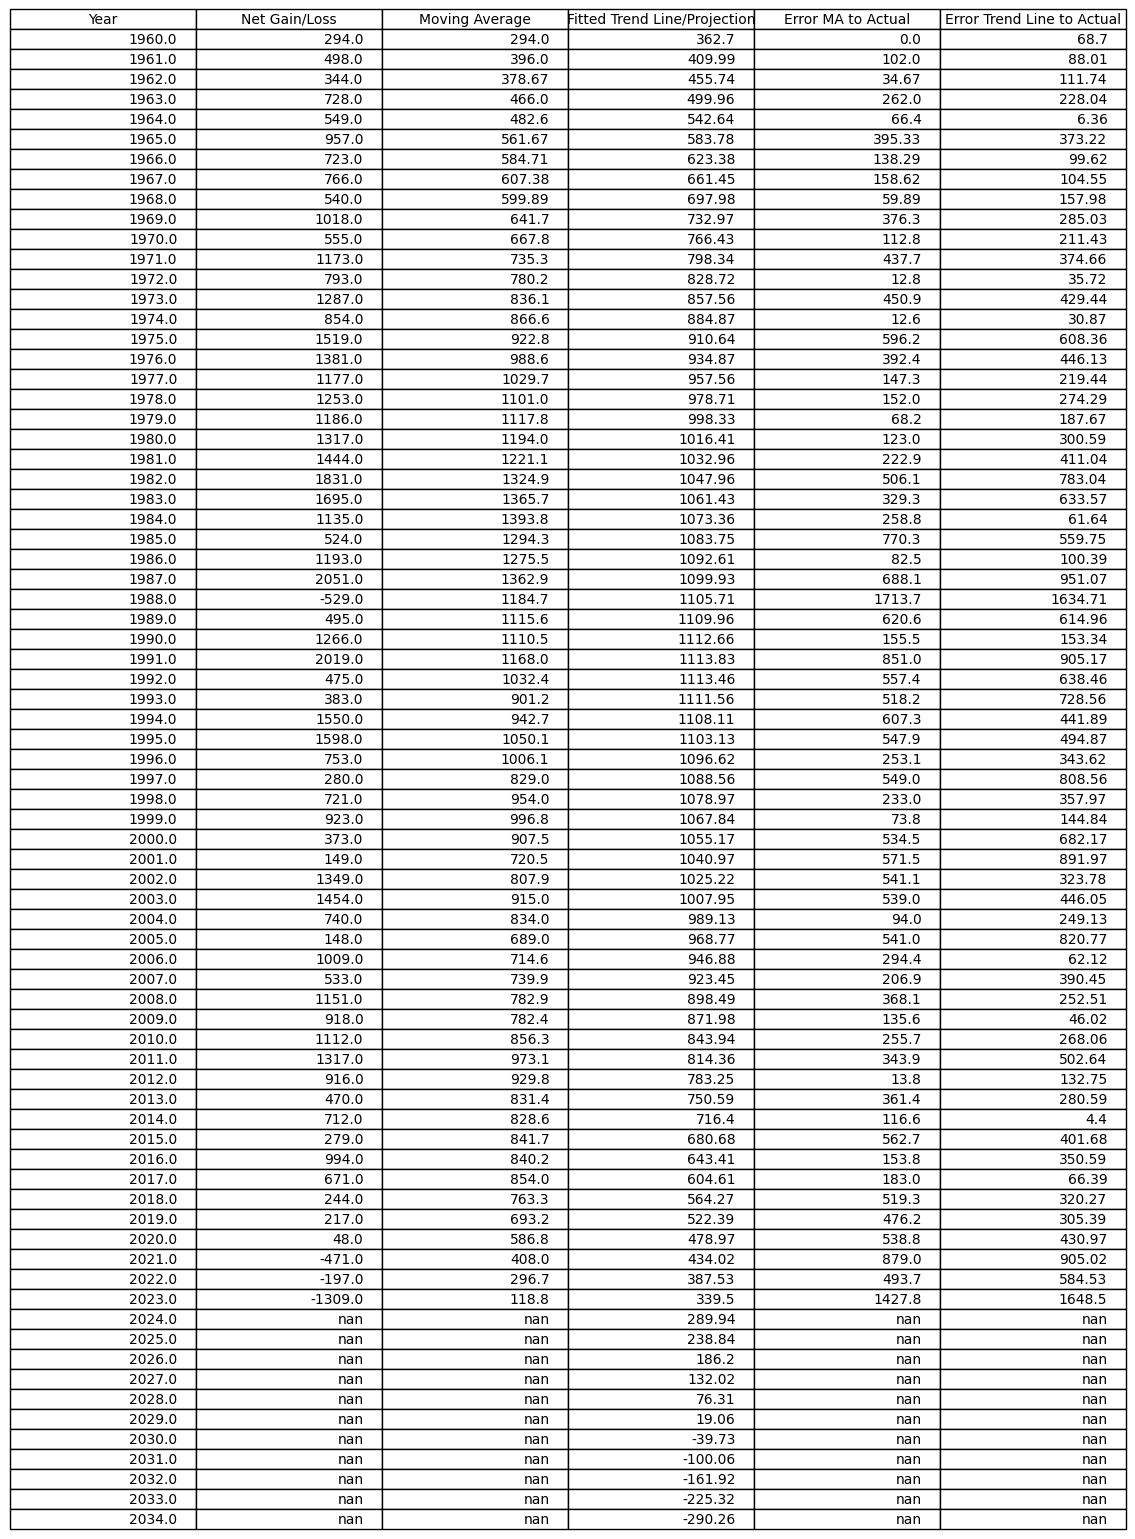

0.7031307047106086

In [114]:
plot_net_gain_loss_of_surveyors_with_errors(df_raw_all_with_secondary,'Surveyor', 'Original Issue Date', 'Expiration Date', window=10, projection_years=10, degree=2)